<a href="https://colab.research.google.com/github/Niharika2098/Projects-Data-Science/blob/main/MajorProject_CKD_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import glob
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc


In [ ]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niharikamylaram","key":"fb7ad71ce15709e61b5dcff9ab8b4c44"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d mansoordaku/ckdisease

  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 21.7MB/s]


In [ ]:
!ls

ckdisease.zip  kaggle.json  sample_data


In [ ]:
! unzip /content/ckdisease.zip

Archive:  /content/ckdisease.zip
  inflating: kidney_disease.csv      


In [ ]:
df = pd.read_csv("/content/kidney_disease.csv")

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# ***Information of DataSet***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**Removing unnecessary Columns**




In [ ]:
df.drop('id',axis=1, inplace = True)

In [ ]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


***Rename the columns with abbreviation***

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.columns = ['age','bloodpressure', 'specificgravity', 'albumin', 'sugar', 'redbloodcells', 'puscell', 'puscell_clumps', 'bacteria', 'bloodglucose_random', 'blood_urea', 'serum_creatinine','sodium', 'potassium', 'haemoglobin', 'packedcell_volume', 'whitebloodcell_count', 'redbloodcell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedaedema', 'anemia', 'class']

In [ ]:
df.columns

Index(['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar',
       'redbloodcells', 'puscell', 'puscell_clumps', 'bacteria',
       'bloodglucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packedcell_volume', 'whitebloodcell_count',
       'redbloodcell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedaedema', 'anemia', 'class'],
      dtype='object')

In [ ]:
df

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscell_clumps,bacteria,bloodglucose_random,...,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.describe()

,age,bloodpressure,specificgravity,albumin,sugar,bloodglucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bloodpressure            388 non-null    float64
 2   specificgravity          353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   redbloodcells            248 non-null    object 
 6   puscell                  335 non-null    object 
 7   puscell_clumps           396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   bloodglucose_random      356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

# **Extracting Numerical and Categorical columns from Dataset**


In [ ]:
cat_cols = df.select_dtypes(exclude=[np.number])

In [ ]:
cat_cols

,redbloodcells,puscell,puscell_clumps,bacteria,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


# **As we can see packedcell_volume, Whitebloodcell_count, redbloodcell_count are in object though it has numbers in it. We need to convert them into numerical type.**

In [ ]:
numr_cols = df.select_dtypes(include=[np.number])

In [ ]:
numr_cols

,age,bloodpressure,specificgravity,albumin,sugar,bloodglucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2


# **Now we need to convert the object type numerical values into actual numerical columns**

In [ ]:
df['packedcell_volume'] = pd.to_numeric(df['packedcell_volume'], errors='coerce')

In [ ]:
df['packedcell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packedcell_volume, Length: 400, dtype: float64

In [ ]:
df['whitebloodcell_count'] = pd.to_numeric(df['whitebloodcell_count'], errors='coerce')

In [ ]:
df['whitebloodcell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: whitebloodcell_count, Length: 400, dtype: float64

In [ ]:
df['redbloodcell_count'] = pd.to_numeric(df['redbloodcell_count'], errors='coerce')

In [ ]:
df['redbloodcell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: redbloodcell_count, Length: 400, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bloodpressure            388 non-null    float64
 2   specificgravity          353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   redbloodcells            248 non-null    object 
 6   puscell                  335 non-null    object 
 7   puscell_clumps           396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   bloodglucose_random      356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

**Re-Checking the numerical and Categorical columns**

In [ ]:
cat_cols = df.select_dtypes(exclude=[np.number])

In [ ]:
cat_cols

,redbloodcells,puscell,puscell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
numrs_cols = df.select_dtypes(include=[np.number])

In [ ]:
numrs_cols

,age,bloodpressure,specificgravity,albumin,sugar,bloodglucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packedcell_volume,whitebloodcell_count,redbloodcell_count
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


**Finding Unique values in Categorical columns**

In [ ]:
for col in cat_cols:
  print(f"{col} has {df[col].unique()} values\n\n")

redbloodcells has [nan 'normal' 'abnormal'] values


puscell has ['normal' 'abnormal' nan] values


puscell_clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary_artery_disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedaedema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




**Replace incorrect Values in the columns**

In [ ]:
df['packedcell_volume'].replace(to_replace ={'\t?': 'nan', '\t43': '43'},inplace=True)
df['whitebloodcell_count'].replace(to_replace ={'\t6200': '6200', '\t8400': '8400','\t?': 'nan'},inplace=True)
df['redbloodcell_count'].replace(to_replace ={'\t?': 'nan'},inplace=True)

In [ ]:
df['packedcell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packedcell_volume, Length: 400, dtype: float64

In [ ]:
df['whitebloodcell_count']

0      7800.0
1      6000.0
2      7500.0
3      6700.0
4      7300.0
        ...  
395    6700.0
396    7800.0
397    6600.0
398    7200.0
399    6800.0
Name: whitebloodcell_count, Length: 400, dtype: float64

In [ ]:
df['redbloodcell_count']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: redbloodcell_count, Length: 400, dtype: float64

In [ ]:
df.head()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscell_clumps,bacteria,bloodglucose_random,...,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes','yes':'yes','no':'no'}, inplace=True)
df['coronary_artery_disease'].replace(to_replace = {'\tno':'no'},inplace=True)
df['class']= df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd':'not ckd','ckd':'ckd','not ckd':'not ckd'})


In [ ]:
cols = ['diabetes_mellitus','coronary_artery_disease','class','packedcell_volume','whitebloodcell_count','redbloodcell_count']
for col in cols:
  print(f"{col} has {df[col].unique()} values\n\n")

diabetes_mellitus has ['yes' 'no' ' yes' nan] values


coronary_artery_disease has ['no' 'yes' nan] values


class has ['ckd' 'not ckd'] values


packedcell_volume has [44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.] values


whitebloodcell_count has [ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  970

In [ ]:
df['class']

0          ckd
1          ckd
2          ckd
3          ckd
4          ckd
        ...   
395    not ckd
396    not ckd
397    not ckd
398    not ckd
399    not ckd
Name: class, Length: 400, dtype: object

In [ ]:
#Checking Distribution of classes using Seaborn and Matplotlib

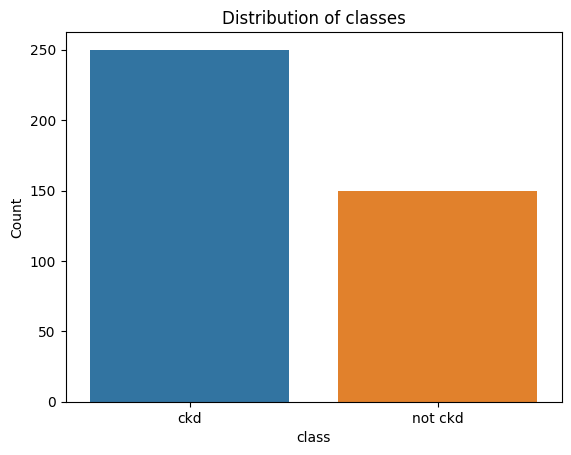

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title('Distribution of classes')
plt.xlabel('class')
plt.ylabel('Count')
plt.show()

In [ ]:
df.shape

(400, 25)

**Checking Distribution for numerical features**

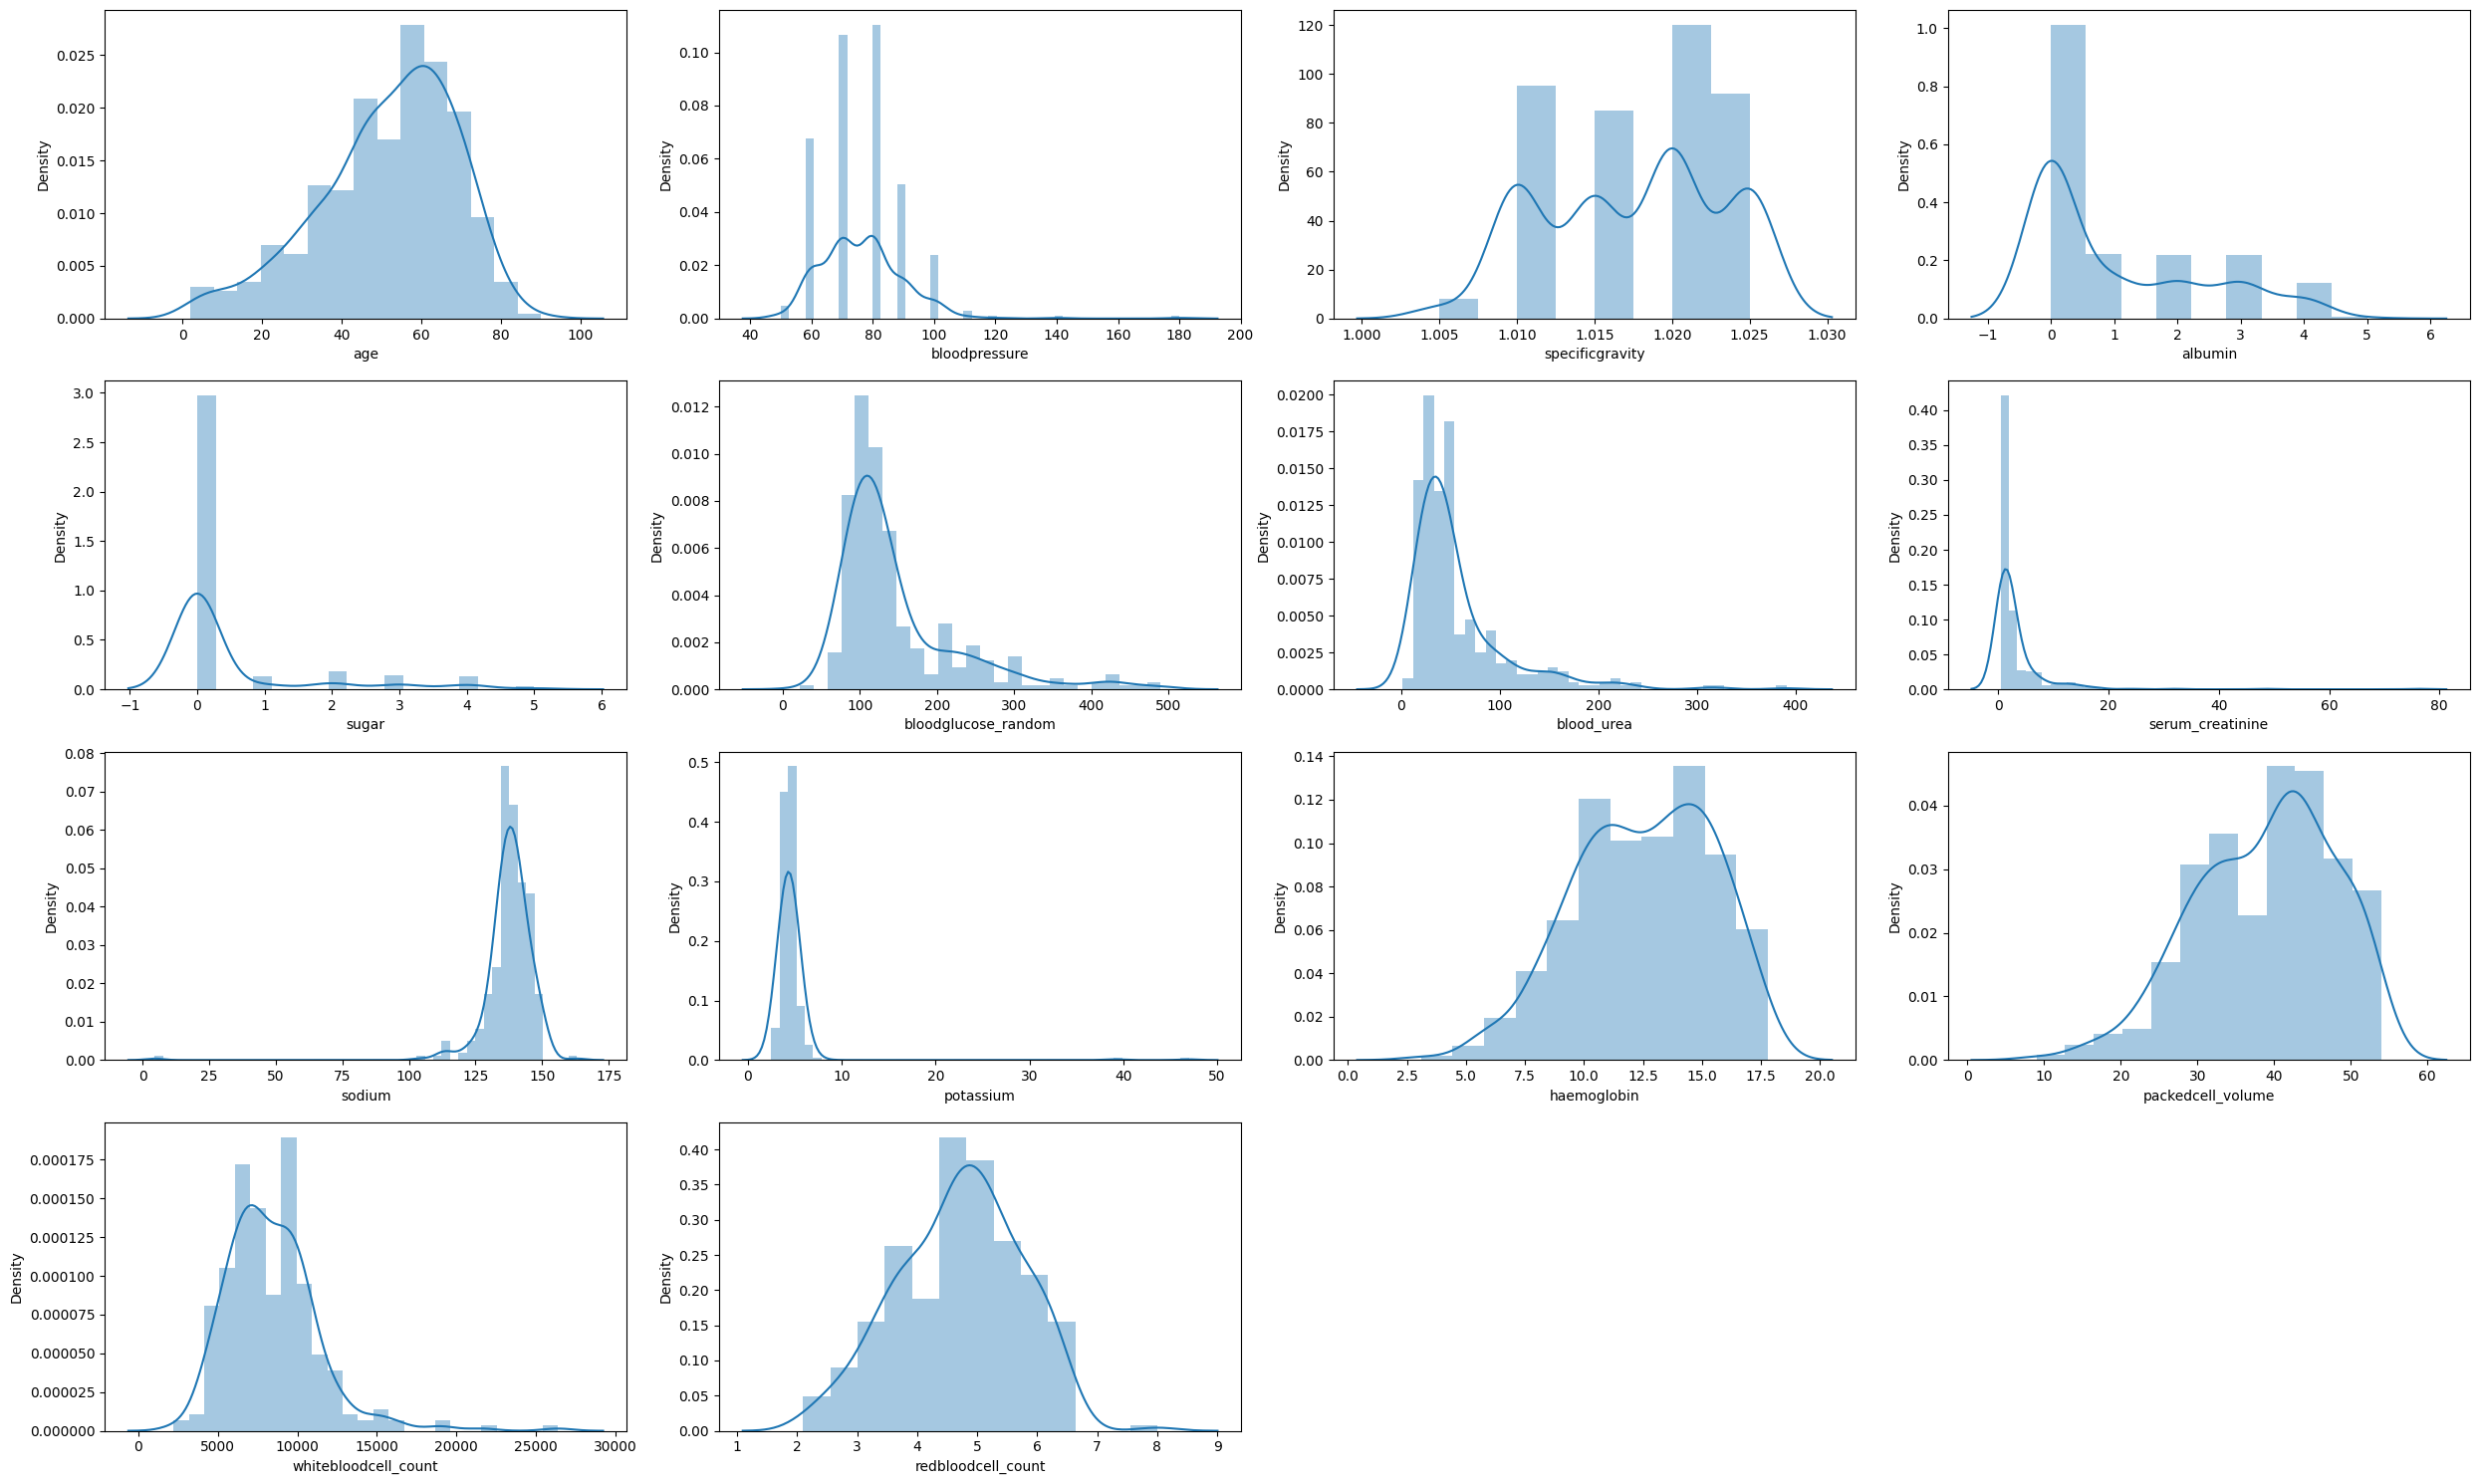

In [ ]:
import seaborn as sns

plt.figure(figsize = (25, 15))
plotnum = 1

for col in numrs_cols:
    if plotnum <= 14:
      axis =plt.subplot(4, 4, plotnum)
      sns.distplot(df[col])
      plt.xlabel(col)

    plotnum += 1

plt.tight_layout()
plt.show()


**Skweness is Present in some of the Features**

In [ ]:
cat_cols

,redbloodcells,puscell,puscell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


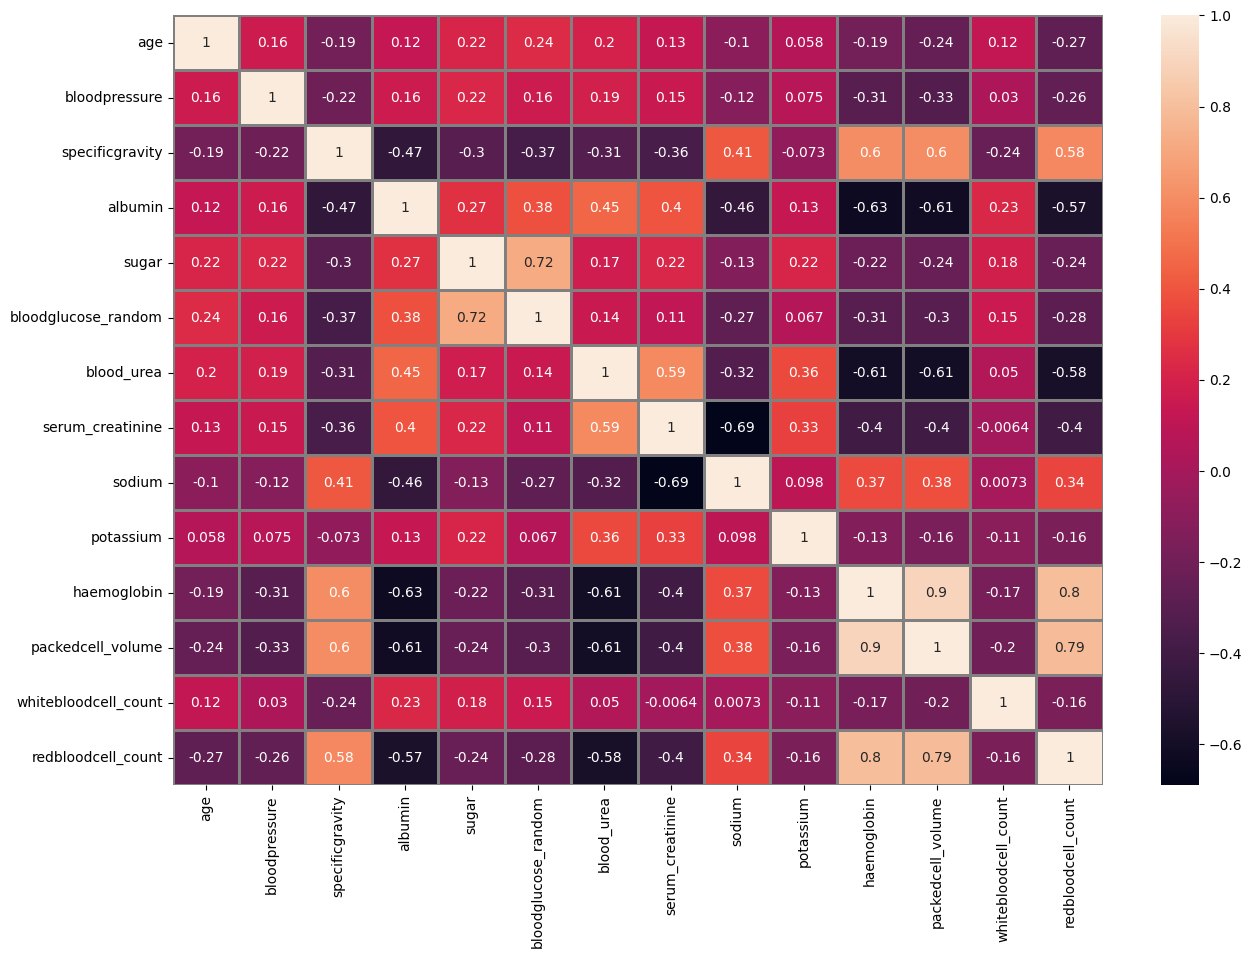

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, linewidths=2, linecolor = 'grey')
plt.show()

**Correlation of Data Using Heat Map**

In [ ]:
#defining function to build plots
import plotly.express as px

def violin(column):
    figure = px.violin(df, y=column, x="class", color="class", box=True, template = 'seaborn',  hover_data=df.columns)
    return figure.show()

def kde(column):
  g = sns.FacetGrid(df, hue="class", height = 8, aspect=2)
  g.map(sns.kdeplot, column)
  g.add_legend()

def scatter (column1, column2):
    figure = px.scatter(df, x=column1, y=column2, color="class", template = 'plotly_dark')
    return figure.show()

In [ ]:
df.columns

Index(['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar',
       'redbloodcells', 'puscell', 'puscell_clumps', 'bacteria',
       'bloodglucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packedcell_volume', 'whitebloodcell_count',
       'redbloodcell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedaedema', 'anemia', 'class'],
      dtype='object')

In [ ]:
violin('redbloodcell_count')

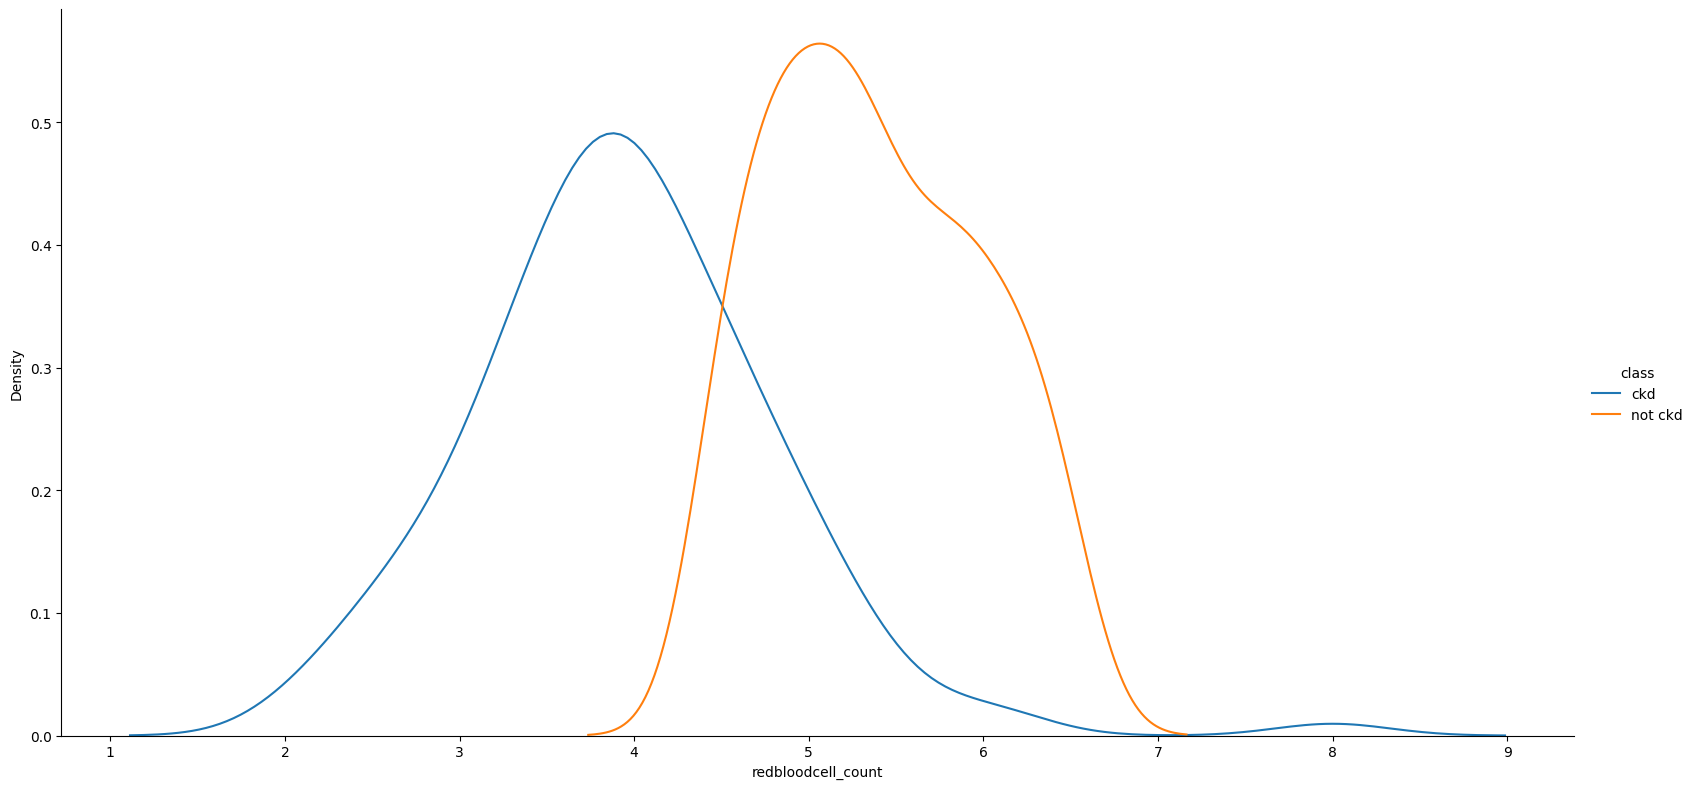

In [ ]:
kde('redbloodcell_count')

In [ ]:
df.columns

Index(['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar',
       'redbloodcells', 'puscell', 'puscell_clumps', 'bacteria',
       'bloodglucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packedcell_volume', 'whitebloodcell_count',
       'redbloodcell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedaedema', 'anemia', 'class'],
      dtype='object')

In [ ]:
violin('haemoglobin')

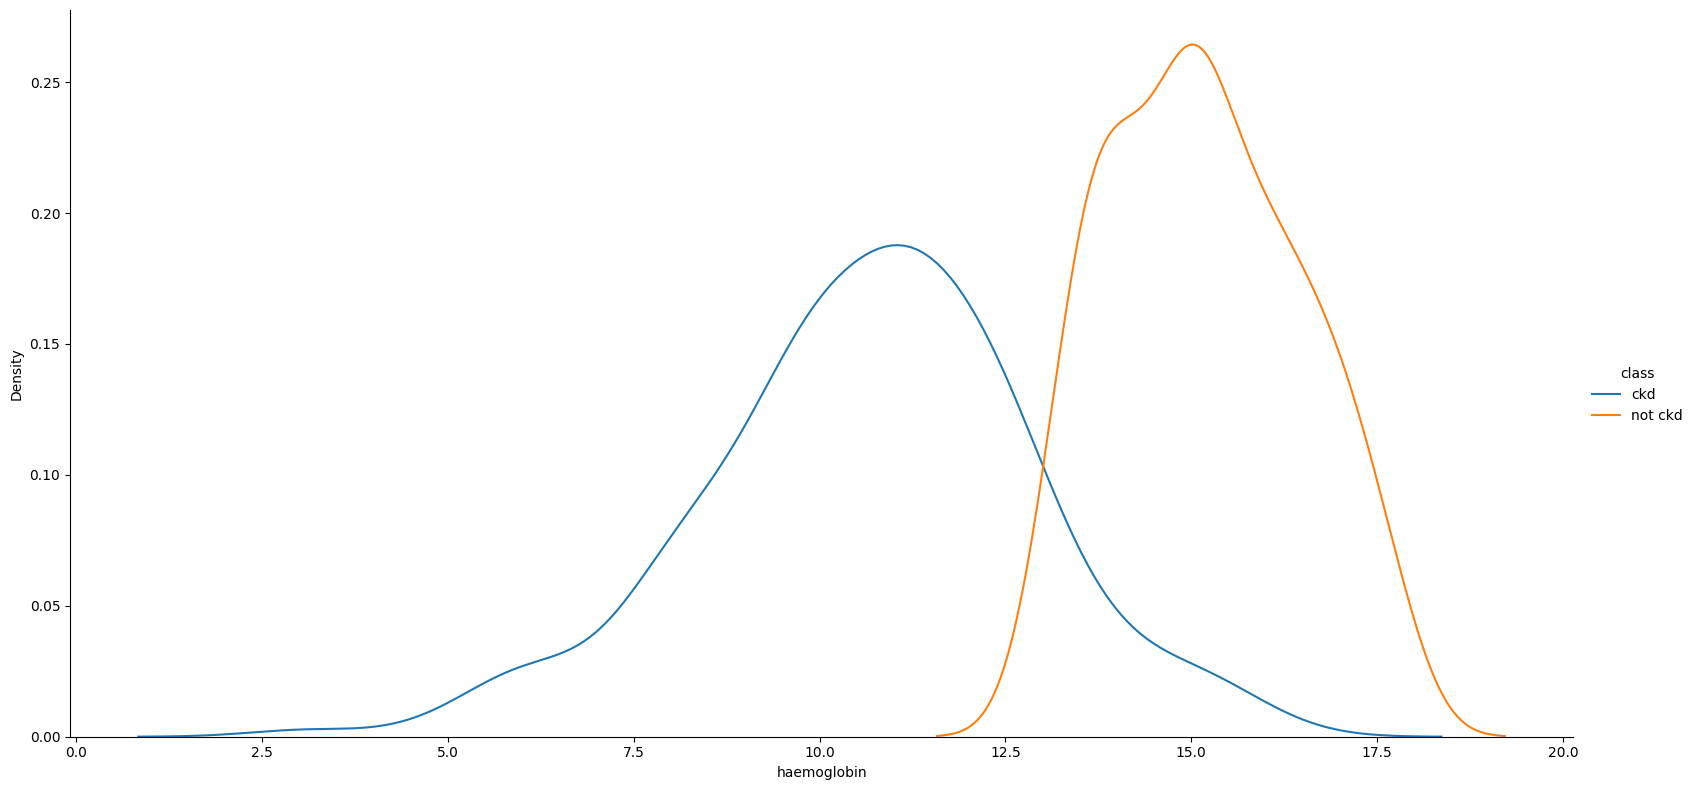

In [ ]:
kde('haemoglobin')

In [ ]:
violin('packedcell_volume')

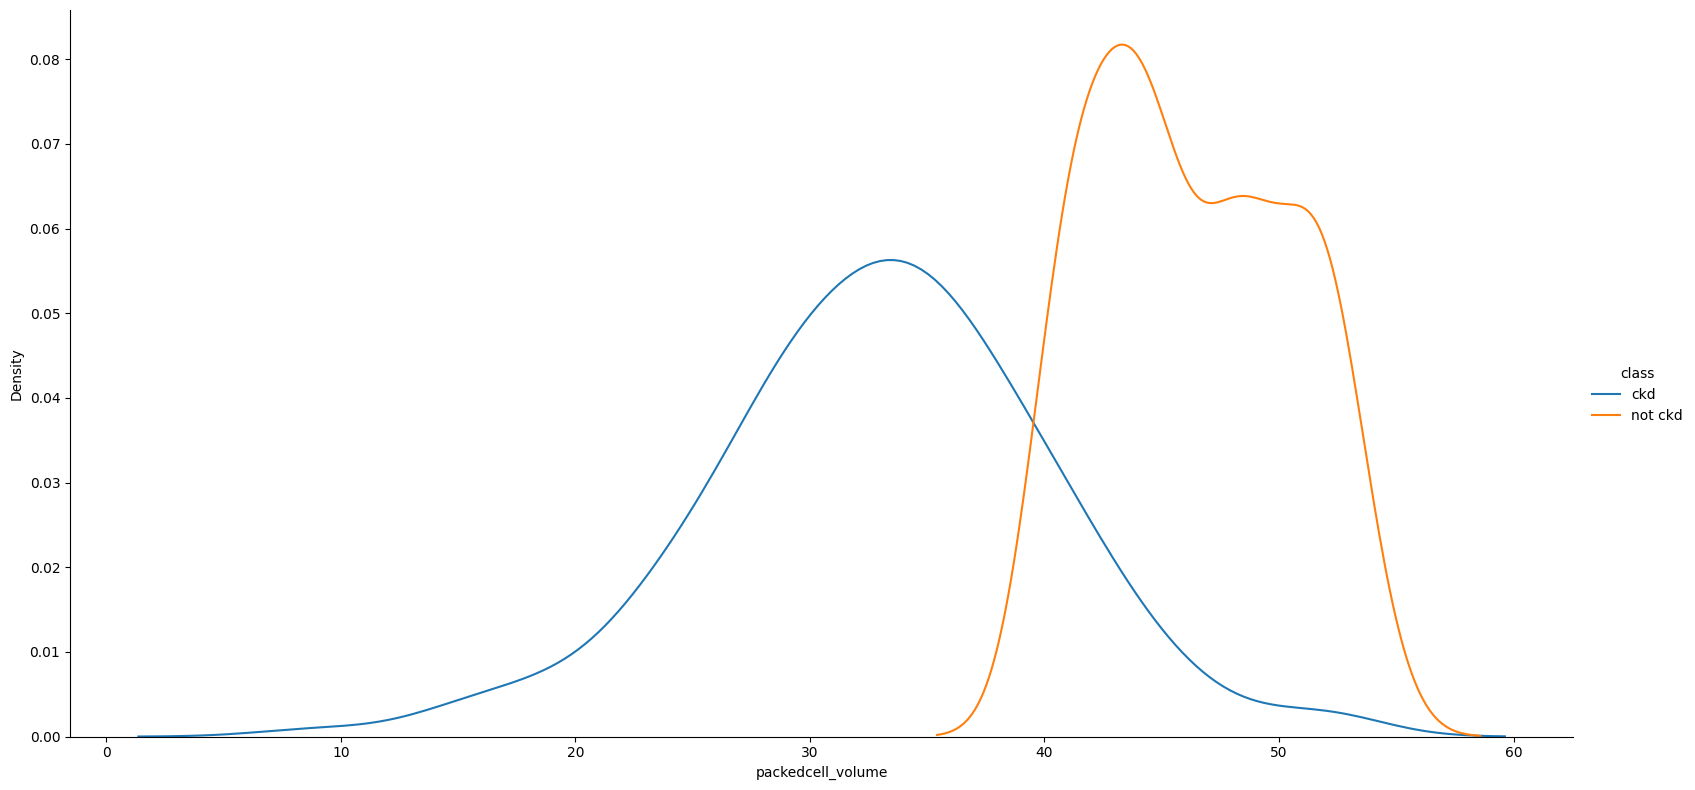

In [ ]:
kde('packedcell_volume')

In [ ]:
violin('bloodglucose_random')

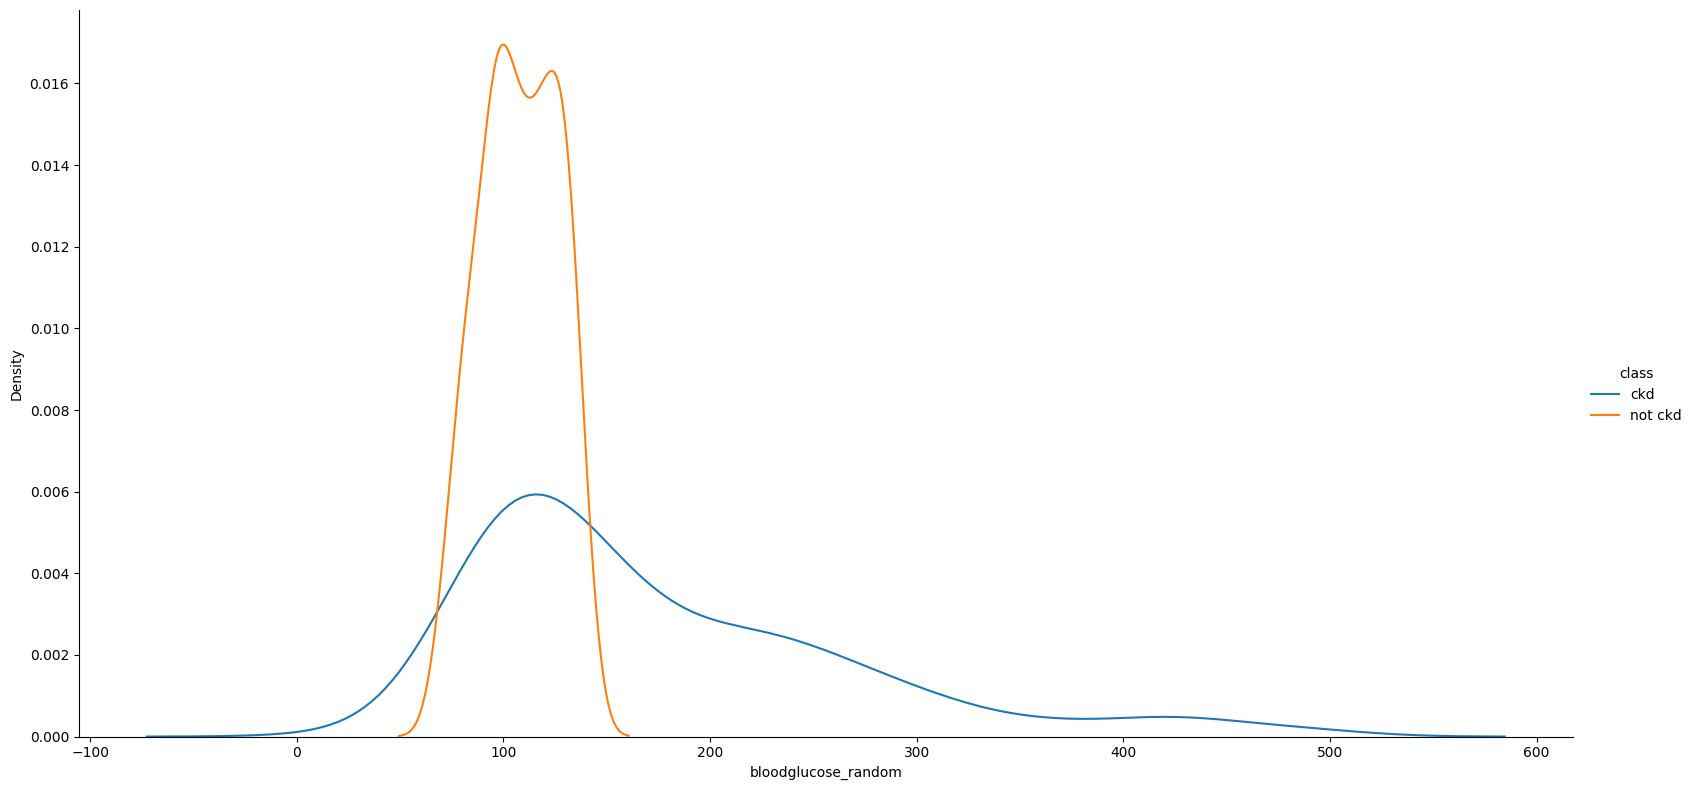

In [ ]:
kde('bloodglucose_random')

In [ ]:
violin('blood_urea')

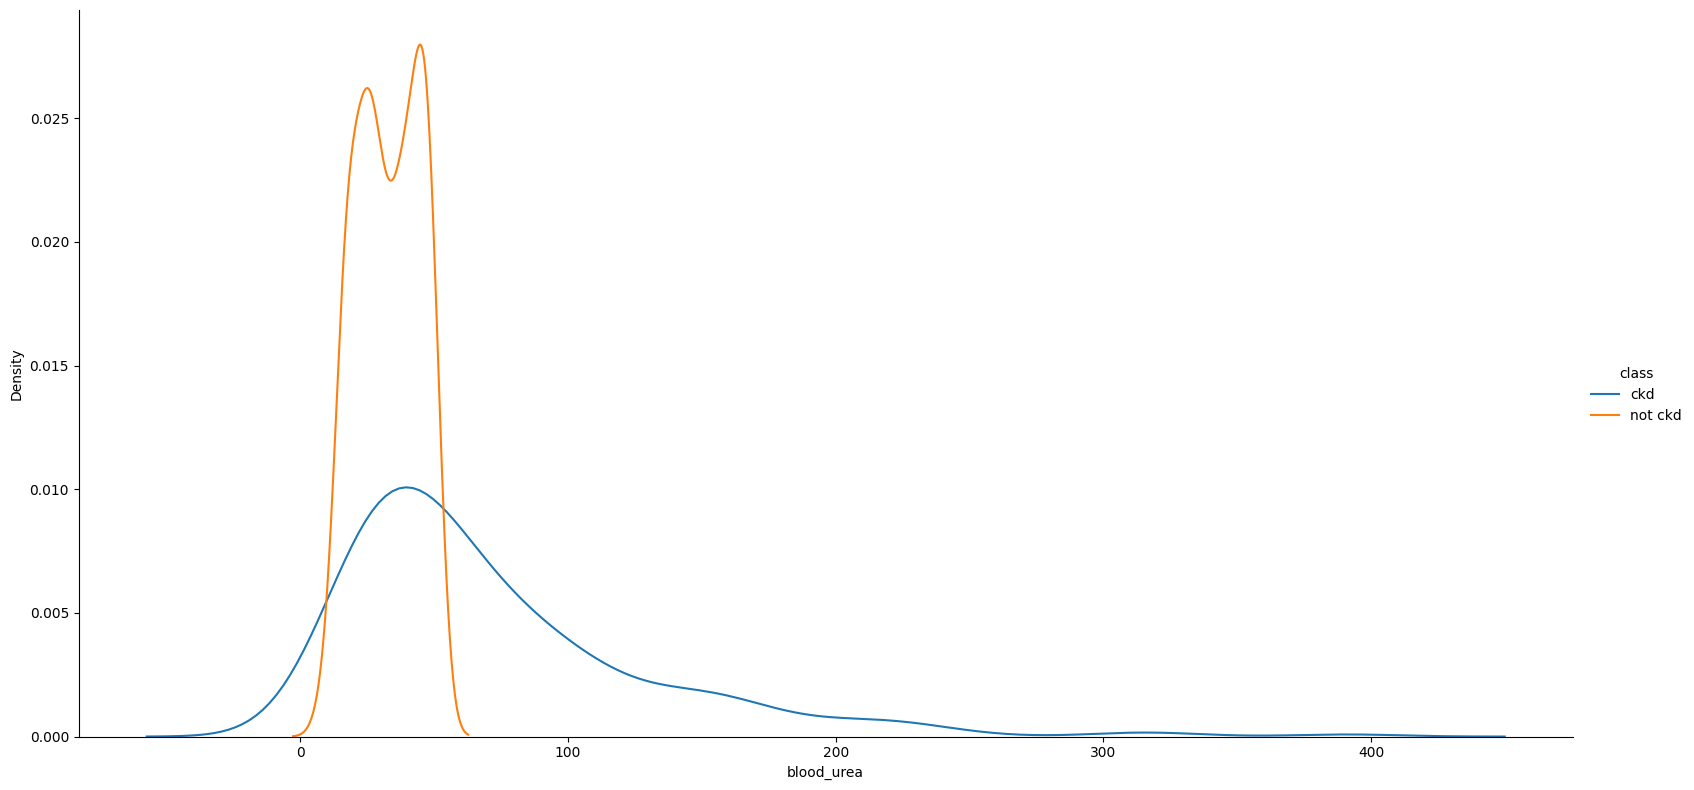

In [ ]:
kde('blood_urea')

In [ ]:
violin('serum_creatinine')

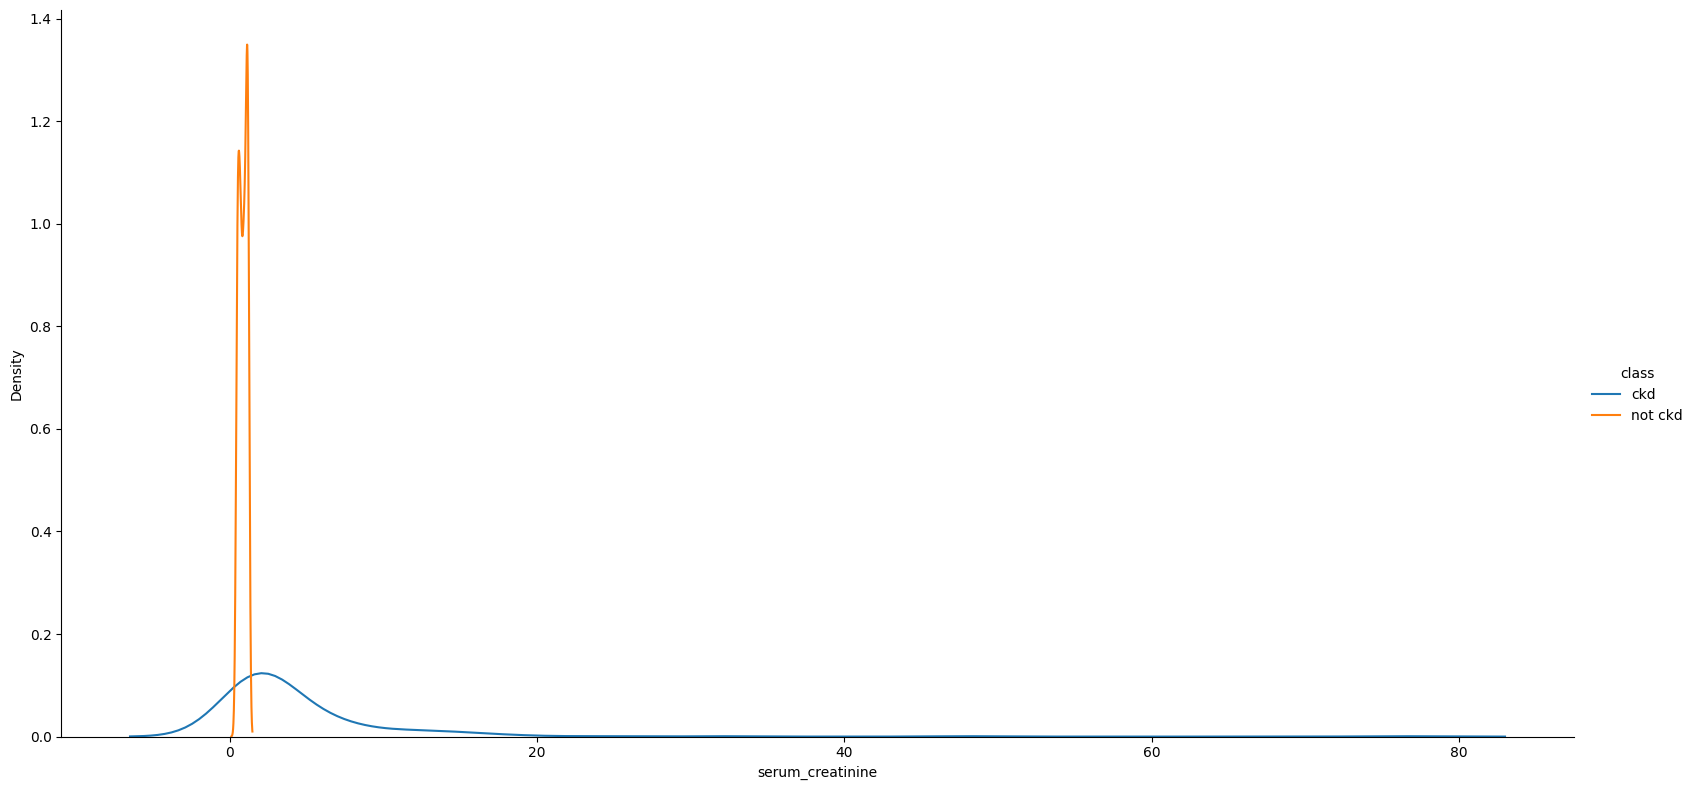

In [ ]:
kde('serum_creatinine')

In [ ]:
violin('sodium')

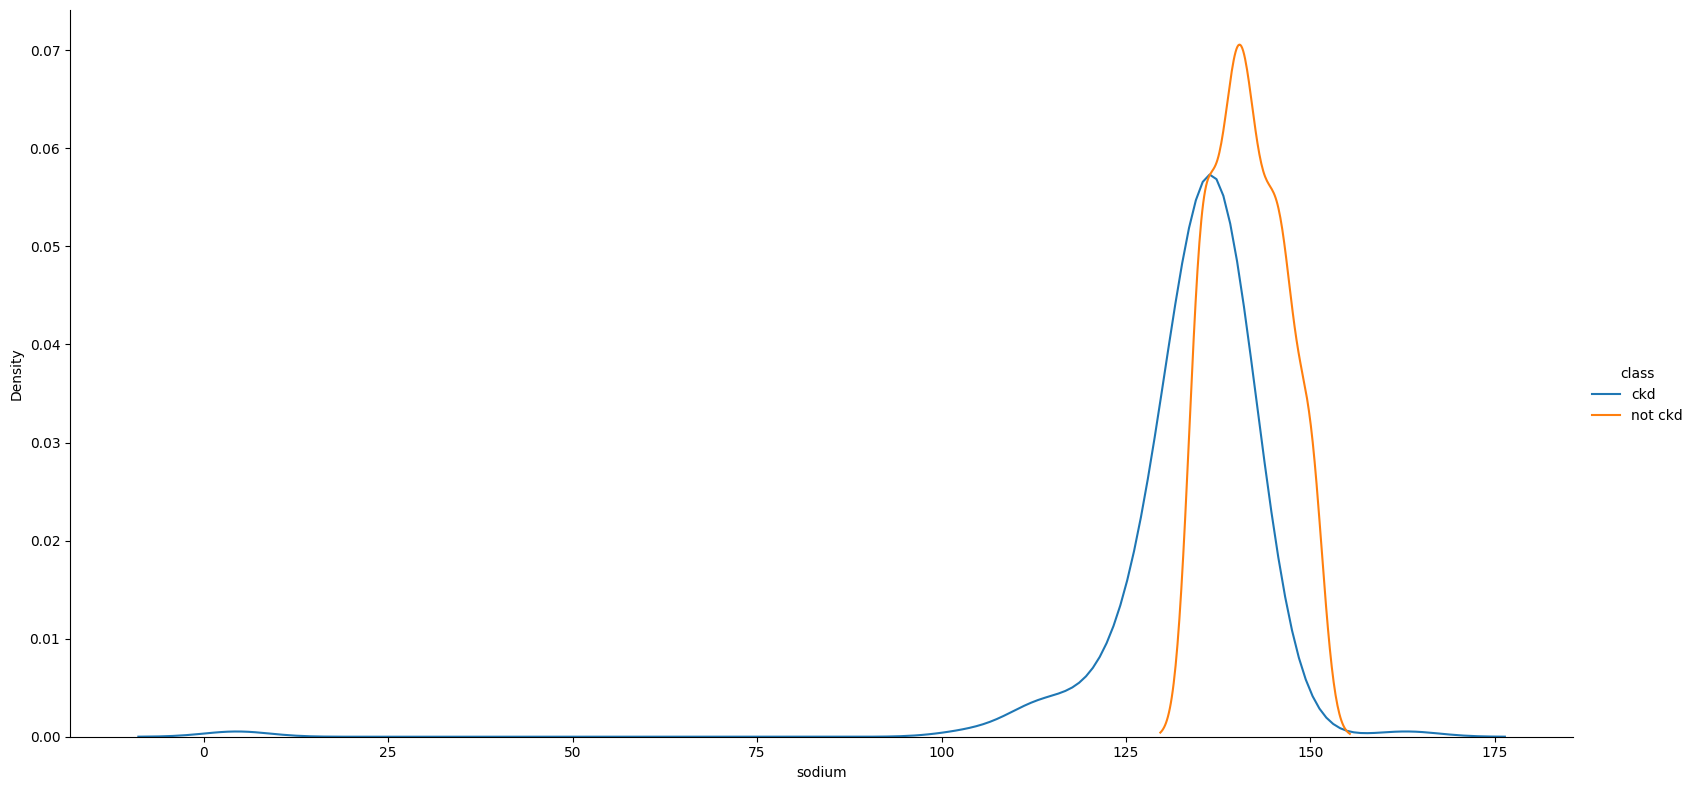

In [ ]:
kde('sodium')

In [ ]:
violin('specificgravity')

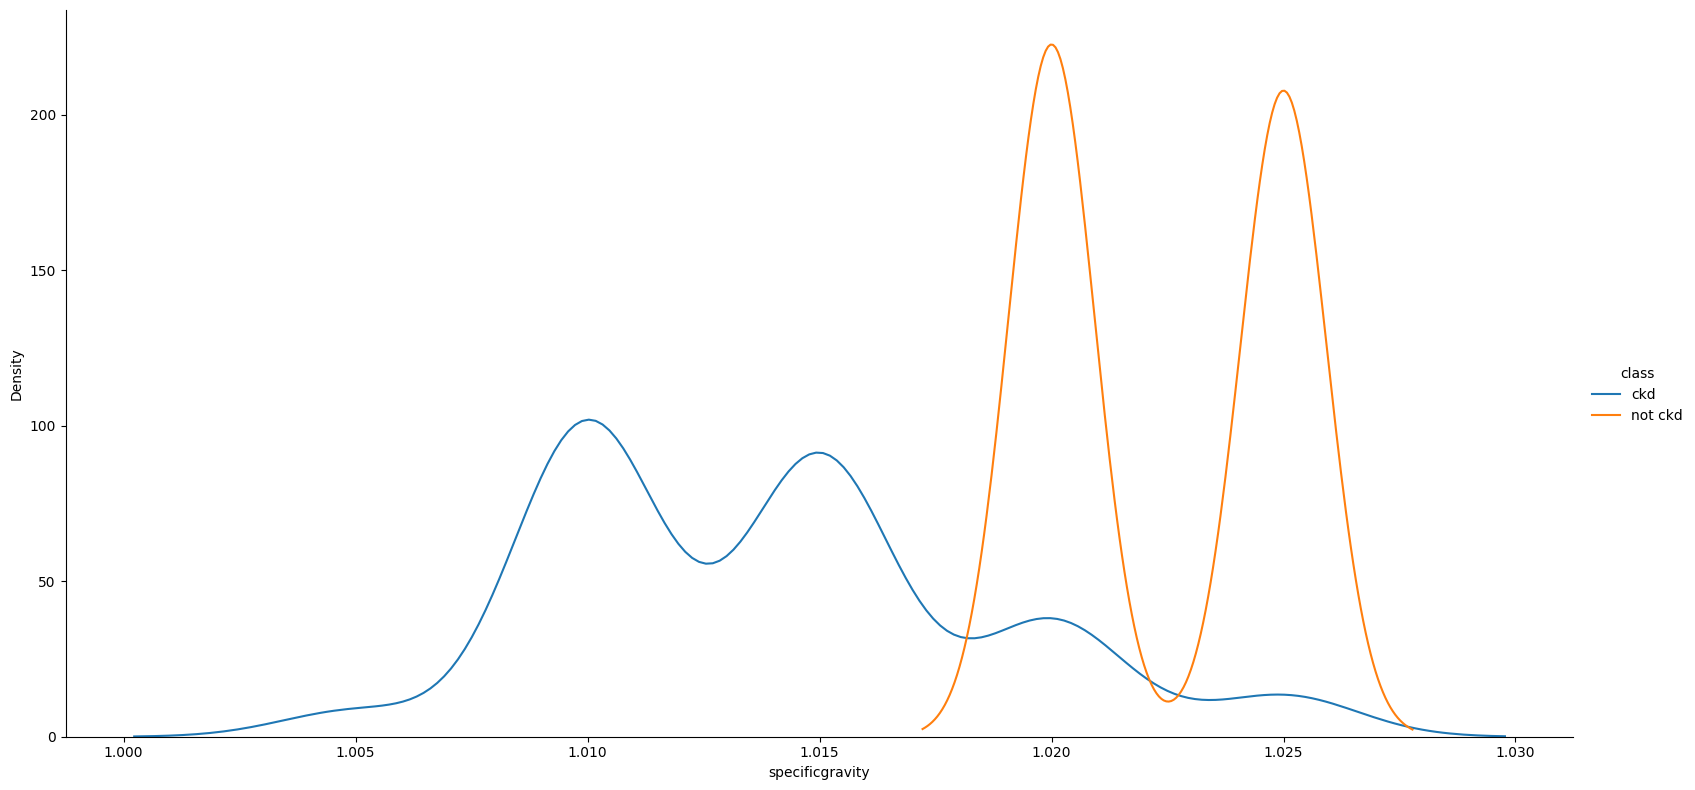

In [ ]:
kde('specificgravity')

In [ ]:
violin('albumin')

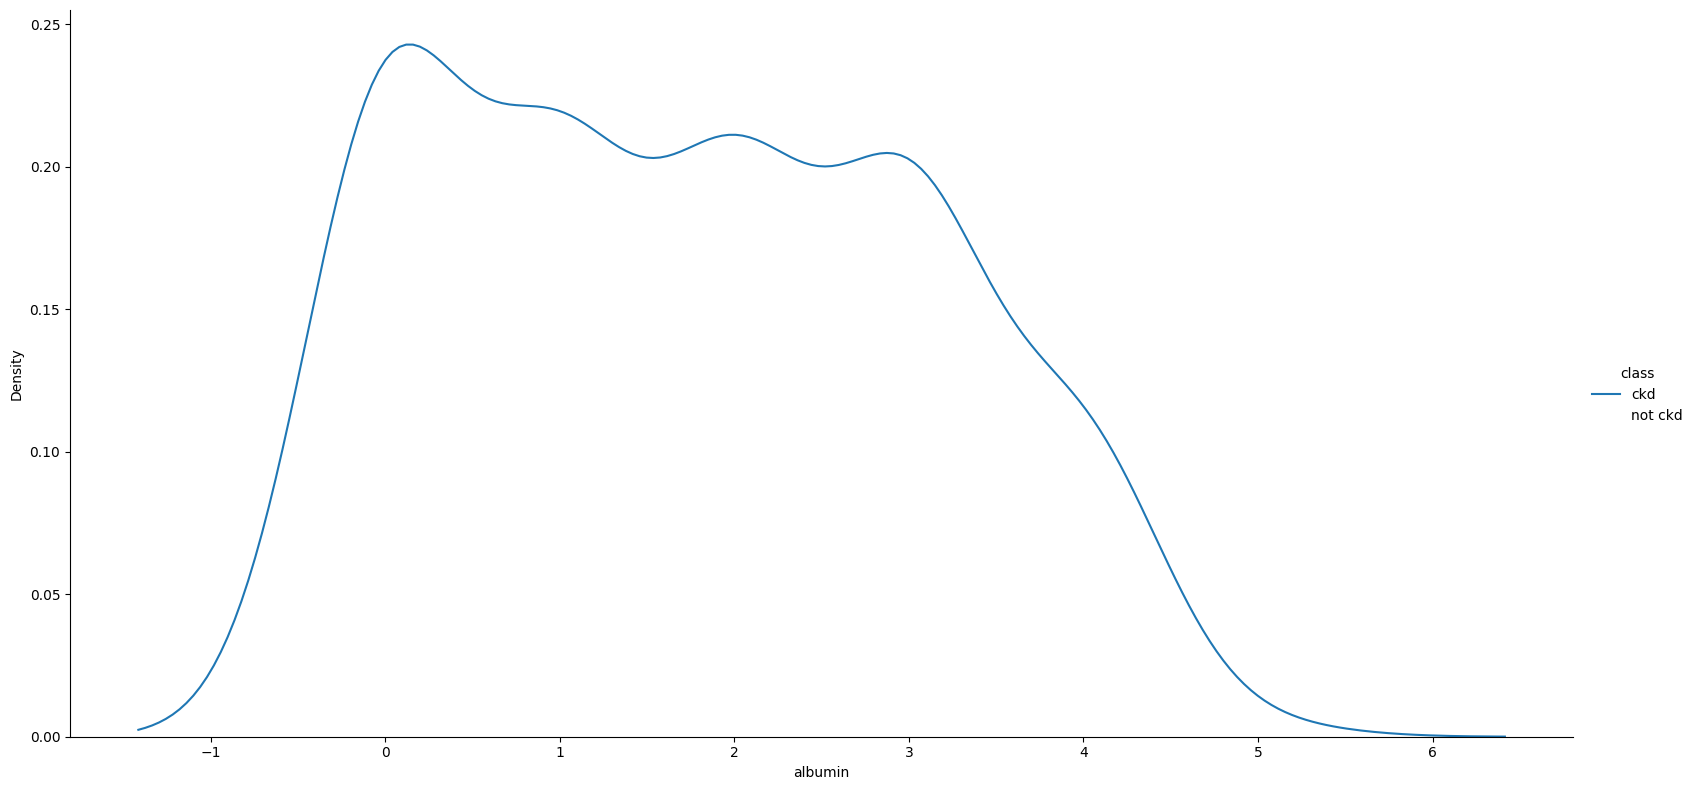

In [ ]:
kde('albumin')

In [ ]:
violin('sugar')

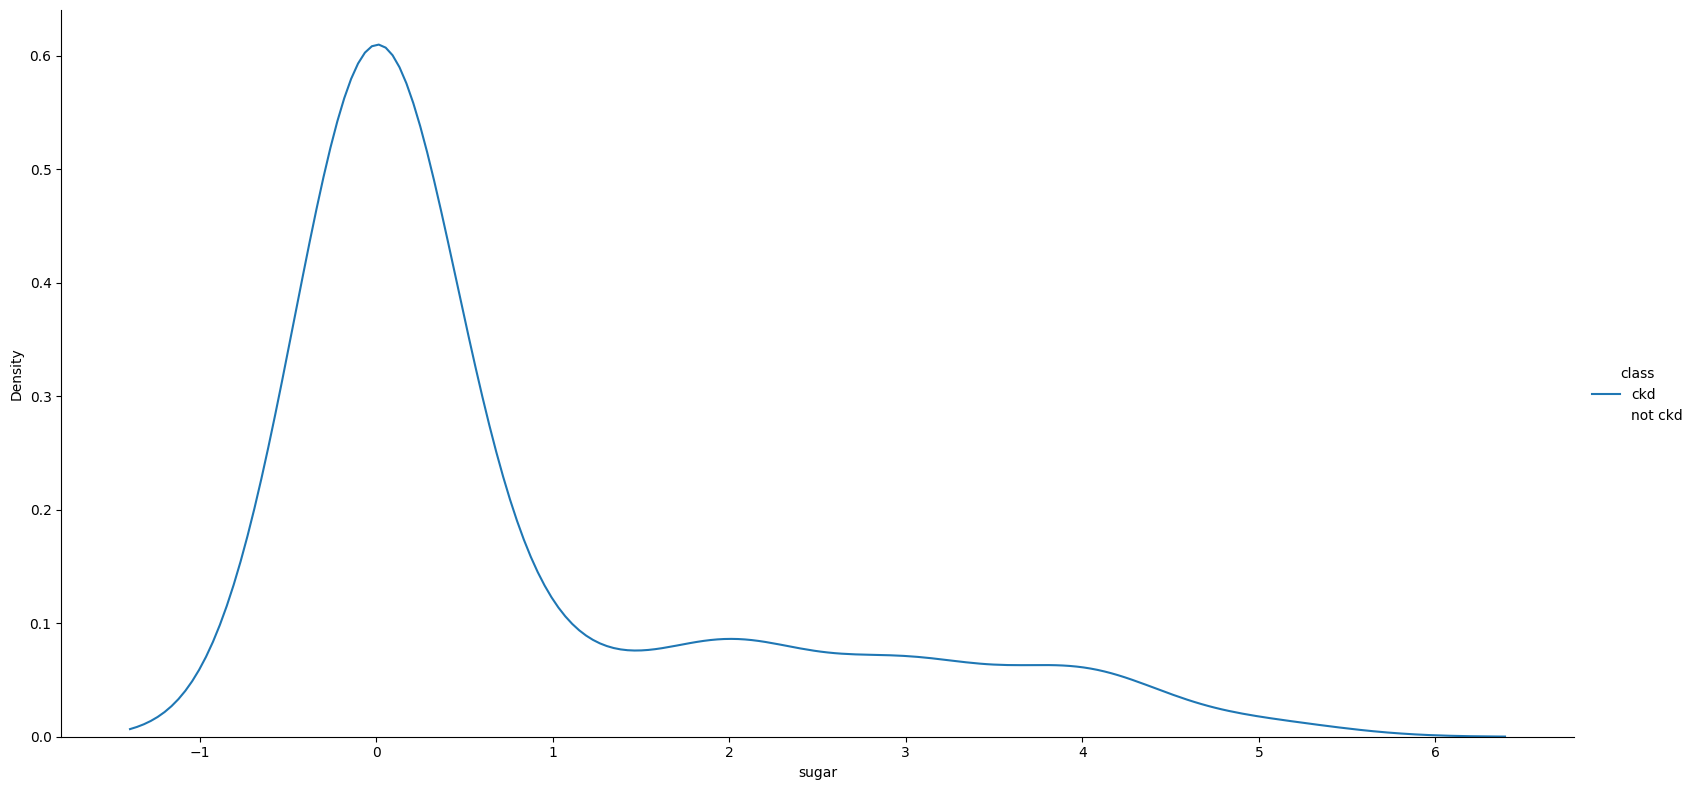

In [ ]:
kde('sugar')

***As the HeatMap depicts there are both +ve and -ve correlated features in the dataset we will plot a scatter plots for better understanding***

In [ ]:
# Positively correlared features
scatter( 'haemoglobin', 'specificgravity')

In [ ]:
from matplotlib import colorbar
px.bar(df, y="haemoglobin", x="specificgravity", color='class', barmode='group', template='seaborn', height= 500)

In [ ]:
scatter("packedcell_volume", "specificgravity")

In [ ]:
from matplotlib import colorbar
px.bar(df, y="packedcell_volume", x="specificgravity", color='class', barmode='group', template='seaborn', height= 500)

In [ ]:

scatter( "redbloodcell_count","specificgravity")

In [ ]:
from matplotlib import colorbar
px.bar(df, y="redbloodcell_count", x="specificgravity", color='class', barmode='group', template='seaborn', height=600)

In [ ]:
scatter( "sugar","bloodglucose_random")

In [ ]:
from matplotlib import colorbar
px.bar(df, y="sugar", x="bloodglucose_random", color='class', barmode='group', template='seaborn', height=1000)

In [ ]:

scatter("redbloodcell_count","haemoglobin")

In [ ]:
from matplotlib import colorbar
px.bar(df, y="haemoglobin", x="redbloodcell_count", color='class', barmode='group', template='seaborn', height= 1000)

In [ ]:
scatter("packedcell_volume","haemoglobin")

In [ ]:
from matplotlib import colorbar
px.bar(df, y="haemoglobin", x="packedcell_volume", color='class', barmode='group', template='seaborn', height= 600)

In [ ]:
# Negatively correlated features using scatter plots

In [ ]:
scatter("specificgravity","albumin")

In [ ]:
scatter("sodium", "albumin")

In [ ]:
scatter("albumin", "haemoglobin")

In [ ]:
scatter("blood_urea", "packedcell_volume")

In [ ]:
scatter("blood_urea", "haemoglobin")

In [ ]:
scatter("blood_urea", "redbloodcell_count")

# **Data Pre-Processing**

---
# Checking full NAN/Null values




In [ ]:
df.isna().sum()

age                          9
bloodpressure               12
specificgravity             47
albumin                     46
sugar                       49
redbloodcells              152
puscell                     65
puscell_clumps               4
bacteria                     4
bloodglucose_random         44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packedcell_volume           71
whitebloodcell_count       106
redbloodcell_count         131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedaedema                    1
anemia                       1
class                        0
dtype: int64

In [ ]:
#arranging in ascending format
df.isna().sum().sort_values(ascending = True)

class                        0
pedaedema                    1
appetite                     1
anemia                       1
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
puscell_clumps               4
bacteria                     4
age                          9
bloodpressure               12
serum_creatinine            17
blood_urea                  19
bloodglucose_random         44
albumin                     46
specificgravity             47
sugar                       49
haemoglobin                 52
puscell                     65
packedcell_volume           71
sodium                      87
potassium                   88
whitebloodcell_count       106
redbloodcell_count         131
redbloodcells              152
dtype: int64

In [ ]:
df

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscell_clumps,bacteria,bloodglucose_random,...,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,not ckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,not ckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,not ckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,not ckd


In [ ]:
numrs_cols.isna().sum()

age                       9
bloodpressure            12
specificgravity          47
albumin                  46
sugar                    49
bloodglucose_random      44
blood_urea               19
serum_creatinine         17
sodium                   87
potassium                88
haemoglobin              52
packedcell_volume        71
whitebloodcell_count    106
redbloodcell_count      131
dtype: int64

In [ ]:
cat_cols.isna().sum()

redbloodcells              152
puscell                     65
puscell_clumps               4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedaedema                    1
anemia                       1
class                        0
dtype: int64

In [ ]:
#we are using 2 methods, random sampling for higher null values and mean/mode sampling for lower null values

In [ ]:
def rand_val_imputation(df, feature_list):
    for feature in feature_list:
      rand_sample = df[feature].dropna().sample(df[feature].isna().sum())
      rand_sample.index = df[df[feature].isnull()].index
      df.loc[df[feature].isnull(), feature] = rand_sample
# list of columns with missing values to be imputed using this code
col_with_nan =['age','bloodpressure','specificgravity','albumin','sugar','bloodglucose_random','blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packedcell_volume','whitebloodcell_count','redbloodcell_count']
# by using random_value_imputation function we call each column for imputing
rand_val_imputation(df, col_with_nan)


In [ ]:
print(df)

      age  bloodpressure  specificgravity  albumin  sugar redbloodcells  \
0    48.0           80.0            1.020      1.0    0.0           NaN   
1     7.0           50.0            1.020      4.0    0.0           NaN   
2    62.0           80.0            1.010      2.0    3.0        normal   
3    48.0           70.0            1.005      4.0    0.0        normal   
4    51.0           80.0            1.010      2.0    0.0        normal   
..    ...            ...              ...      ...    ...           ...   
395  55.0           80.0            1.020      0.0    0.0        normal   
396  42.0           70.0            1.025      0.0    0.0        normal   
397  12.0           80.0            1.020      0.0    0.0        normal   
398  17.0           60.0            1.025      0.0    0.0        normal   
399  58.0           80.0            1.025      0.0    0.0        normal   

      puscell puscell_clumps    bacteria  bloodglucose_random  ...  \
0      normal     notpresent 

In [ ]:
def impute_mode(df, feature_list1):
    for feature in feature_list1:
     mode_val = df[feature].mode().iloc[0]
     df[feature].fillna(mode_val, inplace=True)
column1_with_nan =  ['redbloodcells', 'puscell', 'puscell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedaedema', 'anemia']
impute_mode(df,column1_with_nan)


In [ ]:
print(df)

      age  bloodpressure  specificgravity  albumin  sugar redbloodcells  \
0    48.0           80.0            1.020      1.0    0.0        normal   
1     7.0           50.0            1.020      4.0    0.0        normal   
2    62.0           80.0            1.010      2.0    3.0        normal   
3    48.0           70.0            1.005      4.0    0.0        normal   
4    51.0           80.0            1.010      2.0    0.0        normal   
..    ...            ...              ...      ...    ...           ...   
395  55.0           80.0            1.020      0.0    0.0        normal   
396  42.0           70.0            1.025      0.0    0.0        normal   
397  12.0           80.0            1.020      0.0    0.0        normal   
398  17.0           60.0            1.025      0.0    0.0        normal   
399  58.0           80.0            1.025      0.0    0.0        normal   

      puscell puscell_clumps    bacteria  bloodglucose_random  ...  \
0      normal     notpresent 

# ***All the missing Values are handled***

In [ ]:
df.isna().sum()

age                        0
bloodpressure              0
specificgravity            0
albumin                    0
sugar                      0
redbloodcells              0
puscell                    0
puscell_clumps             0
bacteria                   0
bloodglucose_random        0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packedcell_volume          0
whitebloodcell_count       0
redbloodcell_count         0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedaedema                  0
anemia                     0
class                      0
dtype: int64

# ***Feature Encoding***

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}': {unique_vals}\n\n")


Unique values in 'redbloodcells': ['normal' 'abnormal']


Unique values in 'puscell': ['normal' 'abnormal']


Unique values in 'puscell_clumps': ['notpresent' 'present']


Unique values in 'bacteria': ['notpresent' 'present']


Unique values in 'hypertension': ['yes' 'no']


Unique values in 'diabetes_mellitus': ['yes' 'no' ' yes']


Unique values in 'coronary_artery_disease': ['no' 'yes']


Unique values in 'appetite': ['good' 'poor']


Unique values in 'pedaedema': ['no' 'yes']


Unique values in 'anemia': ['no' 'yes']


Unique values in 'class': ['ckd' 'not ckd']




# ***There are 2 categories in categorical columns so we use Label Encoder Method***

In [ ]:
from sklearn.preprocessing import LabelEncoder
#intializing Label Encoder Method
label_encoder = LabelEncoder()
#Encode each categorical values using for loop and print the result
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
print(df)


      age  bloodpressure  specificgravity  albumin  sugar  redbloodcells  \
0    48.0           80.0            1.020      1.0    0.0              1   
1     7.0           50.0            1.020      4.0    0.0              1   
2    62.0           80.0            1.010      2.0    3.0              1   
3    48.0           70.0            1.005      4.0    0.0              1   
4    51.0           80.0            1.010      2.0    0.0              1   
..    ...            ...              ...      ...    ...            ...   
395  55.0           80.0            1.020      0.0    0.0              1   
396  42.0           70.0            1.025      0.0    0.0              1   
397  12.0           80.0            1.020      0.0    0.0              1   
398  17.0           60.0            1.025      0.0    0.0              1   
399  58.0           80.0            1.025      0.0    0.0              1   

     puscell  puscell_clumps  bacteria  bloodglucose_random  ...  \
0          1       

In [ ]:
df

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscell_clumps,bacteria,bloodglucose_random,...,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,114.0,...,38.0,6000.0,6.2,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.2,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,1


In [ ]:
df.describe()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscell_clumps,bacteria,bloodglucose_random,...,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
count,400.00000,400.00000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.24250,76.47500,1.017475,1.02000,0.472500,0.882500,0.810000,0.105000,0.055000,147.542500,...,38.91250,8488.250000,4.718000,0.367500,1.337500,0.085000,0.205000,0.190000,0.150000,0.375000
std,17.27483,13.53819,0.005730,1.35617,1.123566,0.322418,0.392792,0.306937,0.228266,80.101428,...,9.04319,3138.888097,1.048343,0.482728,0.478714,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.00000,50.00000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.00000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.00000,70.00000,1.010000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.00000,6500.000000,3.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.00000,80.00000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,120.500000,...,40.50000,8000.000000,4.800000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.00000,80.00000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,162.000000,...,46.00000,9800.000000,5.500000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.00000,180.00000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.00000,26400.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Transform Data to Excel file**






In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
X = pd.DataFrame(df)
X.to_excel(excel_writer = r'/content/gdrive/MyDrive/CKD_ExcelFile/CKD_Excel.xlsx')

In [ ]:
X

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscell_clumps,bacteria,bloodglucose_random,...,packedcell_volume,whitebloodcell_count,redbloodcell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedaedema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,114.0,...,38.0,6000.0,6.2,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.2,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,1,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,1,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,1,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,1,0,0,0,0,1


# **Applying SMOTE Method to Balance Dataset**

In [ ]:
X_train = df.drop(['class'], axis=1)
y_train = df['class']
X_train.shape, y_train.shape

((400, 24), (400,))

In [ ]:
sm = SMOTE(random_state=2)
Xtrain_resampled, ytrain_resampled = sm.fit_resample(X_train, y_train.ravel())
Xtrain_resampled.shape, ytrain_resampled.shape
len(ytrain_resampled[ytrain_resampled==0]), len(ytrain_resampled[ytrain_resampled==1])

(250, 250)

# **Model Building and Evaluation without any Feature Selection Method**

In [ ]:
# Assuming 'X' is your feature matrix and 'y' is your target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# **LogisticRegression without Feature Selection**

Training Accuracy of LogisticRegression is 0.8857142857142857
Testing Accuracy of LogisticRegression is 0.9

[[68  8]
 [ 4 40]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        76
           1       0.83      0.91      0.87        44

    accuracy                           0.90       120
   macro avg       0.89      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120



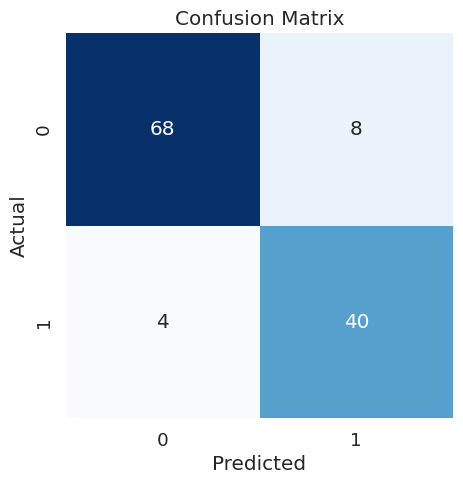

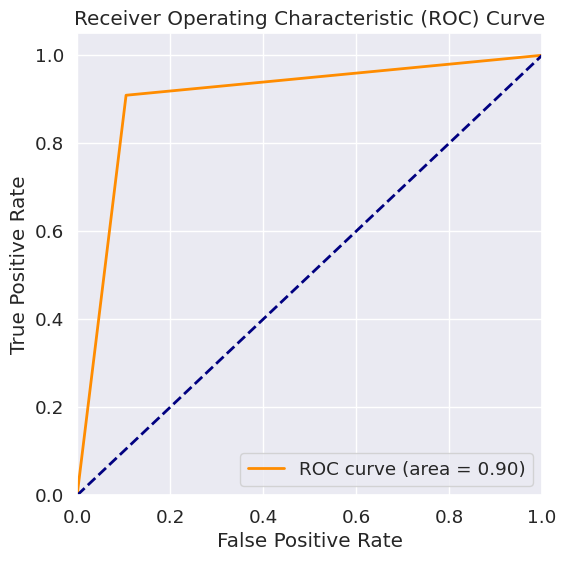

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg = Log_Reg.fit(Xtrain,ytrain)
#accuracy score, confusion matrix and classification report of LogisticRegression
log_reg_acc = accuracy_score(ytest, Log_Reg.predict(Xtest))
print(f"Training Accuracy of LogisticRegression is {accuracy_score(ytrain, Log_Reg.predict(Xtrain))}")
print(f"Testing Accuracy of LogisticRegression is {log_reg_acc}\n")
Con_Mat = metrics.confusion_matrix(ytest, Log_Reg.predict(Xtest))
print(Con_Mat)
print(classification_report(ytest, Log_Reg.predict(Xtest)))
##Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2)
sns.heatmap(Con_Mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
fpr, tpr, thresholds = roc_curve(ytest, Log_Reg.predict(Xtest))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# **Random Forest Classifier without Feature Selection**

Training Accuracy of Random Forest Classifier is 1.0
Testing Accuracy of Random Forest Classifier is 0.9833333333333333

[[76  0]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.95      0.98        44

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



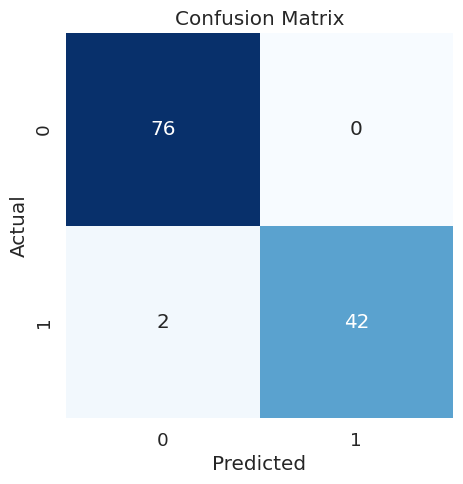

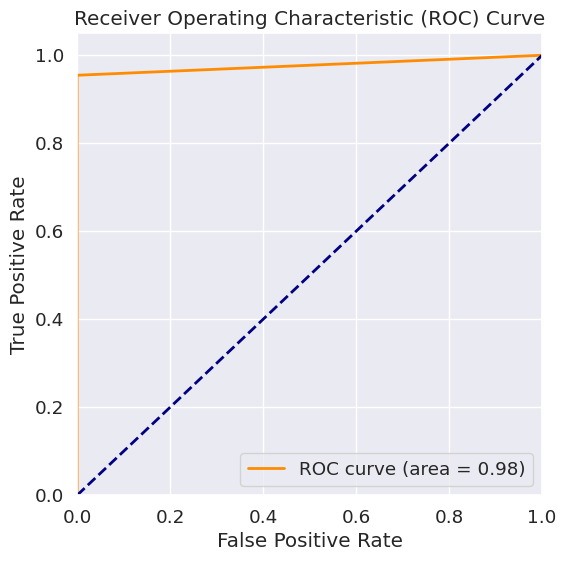

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(Xtrain,ytrain)
#accuracy score, confusion matrix and classification report of Random Forest Classifier
rfc_acc = accuracy_score(ytest, rfc.predict(Xtest))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(ytrain, rfc.predict(Xtrain))}")
print(f"Testing Accuracy of Random Forest Classifier is {rfc_acc}\n")
Con_Mat = metrics.confusion_matrix(ytest, rfc.predict(Xtest))
print(Con_Mat)
print(classification_report(ytest, rfc.predict(Xtest)))
##Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2)
sns.heatmap(Con_Mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
fpr, tpr, thresholds = roc_curve(ytest, rfc.predict(Xtest))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# **LightGBM without Feature Selection**

[LightGBM] [Info] Number of positive: 106, number of negative: 174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378571 -> initscore=-0.495616
[LightGBM] [Info] Start training from score -0.495616
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

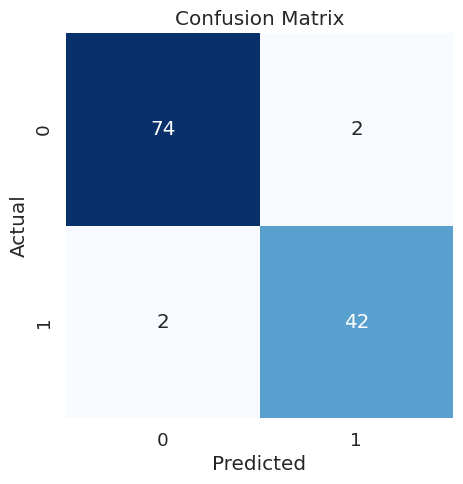

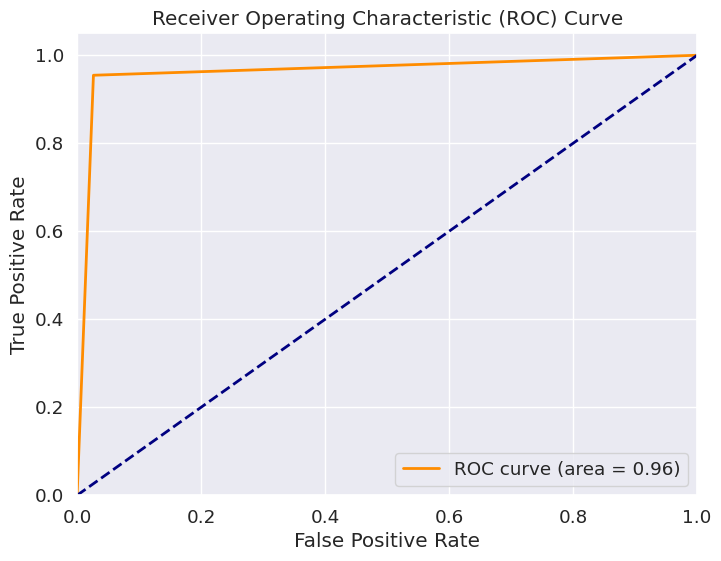

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn import metrics
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lgb_model = lgb.LGBMClassifier()
lgb =lgb_model.fit(Xtrain, ytrain)
#accuracy score, confusion matrix and classification report of LightGBM
lgb_model_acc = accuracy_score(ytest, lgb_model.predict(Xtest))
print(f"Training Accuracy of LightGBM is {accuracy_score(ytrain, lgb_model.predict(Xtrain))}")
print(f"Testing Accuracy of Random Forest Classifier is {lgb_model_acc}\n")
Con_Mat = metrics.confusion_matrix(ytest, lgb_model.predict(Xtest))
print(Con_Mat)
print(classification_report(ytest, lgb_model.predict(Xtest)))
##Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2)
sns.heatmap(Con_Mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
fpr, tpr, thresholds = roc_curve(ytest, lgb_model.predict(Xtest))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




# **Support Vector Machine Without Feature Selection**

Training Accuracy of Support Vector Machine is0.6214285714285714

Testing Accuracy of Support Vector Machine is 0.6333333333333333

[[76  0]
 [44  0]]
classification_report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120



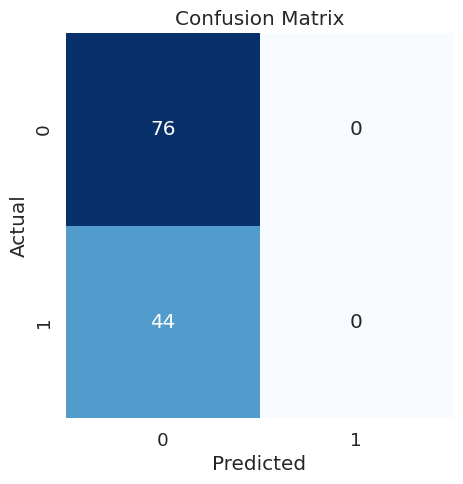

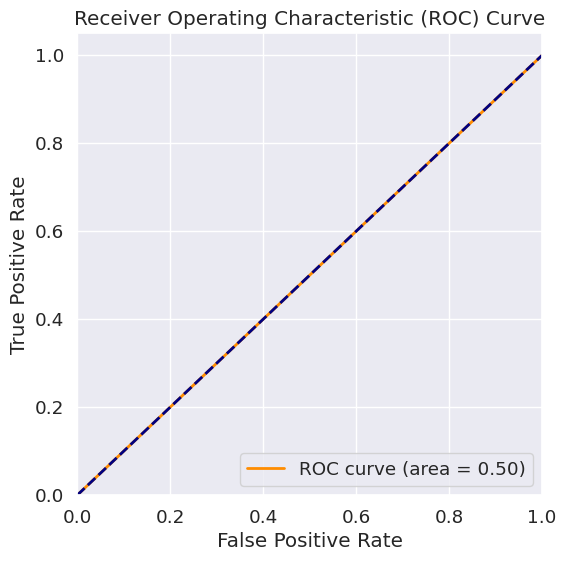

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn import metrics
from sklearn.svm import SVC
svm = SVC()
svm.fit(Xtrain, ytrain)
y_pred_train = svm.predict(Xtrain)
svm_train_acc = accuracy_score(ytrain, y_pred_train)
print(f"Training Accuracy of Support Vector Machine is{svm_train_acc}\n")

y_pred = svm.predict(Xtest)
svm_test_acc = accuracy_score(ytest, y_pred)

#accuracy score, confusion matrix and classification report of Support Vector Machine
#svm_acc = accuracy_score(ytest, y_pred)
#print(f"Training Accuracy of Support Vector Machine is {accuracy_score(ytrain, y_pred)}")
print(f"Testing Accuracy of Support Vector Machine is {svm_test_acc}\n")
Con_Mat = confusion_matrix(ytest, y_pred)
print(Con_Mat)

cf_report = classification_report(ytest, y_pred)
print("classification_report:\n", cf_report)
##Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2)
sns.heatmap(Con_Mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(ytest, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **Now we are checking with Feature Section Wrapper Method(RFE - Reccursive Feature Elimination)**

# **Logistic Regression**

Cross-Validation Scores: [0.98 0.96 0.98 0.94 0.96 1.   1.   0.94 0.96 1.  ]
Average Cross-Validation Score: 0.9719999999999999
Training Accuracy: 0.99
Testing Accuracy: 0.9833333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



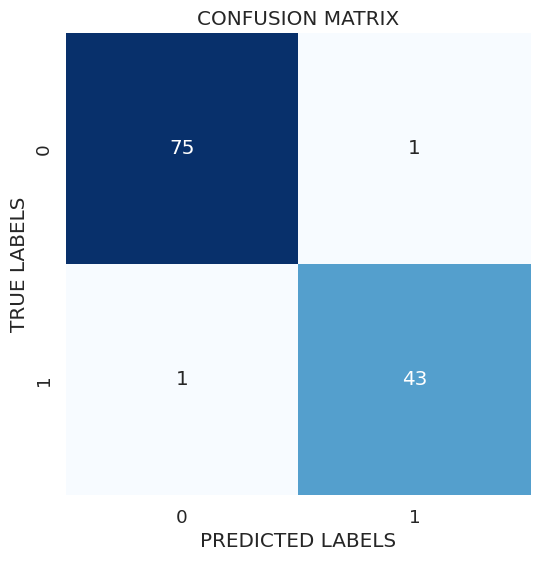

AUC: <function auc at 0x77ff152e69e0>


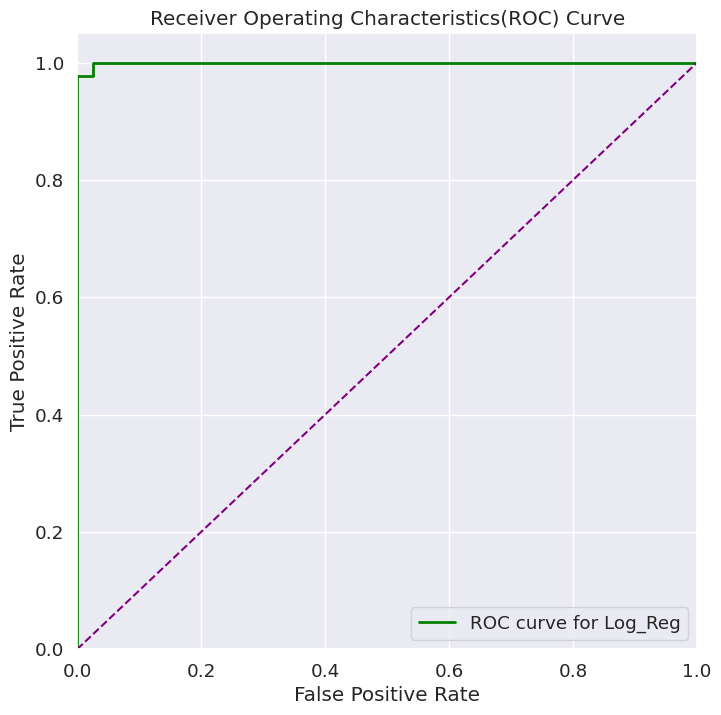

SELECTED FEATURES: ['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar', 'redbloodcells', 'puscell', 'puscell_clumps', 'bacteria', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packedcell_volume', 'redbloodcell_count', 'hypertension', 'diabetes_mellitus', 'appetite', 'pedaedema', 'anemia']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming 'X' is your feature matrix and 'y' is your target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#initialize the base model
base_model = LogisticRegression()
#initialize the wrapper method (RecursiveFeatureElimination)
number_of_features_to_select = 20
rfe = RFE(estimator=base_model, n_features_to_select=number_of_features_to_select)
#Perform cross_validation during feature_selection
X_train_selected = rfe.fit_transform(Xtrain_resampled, ytrain_resampled)
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

#Perform cross_validation during model_evaluation
cross_val_scores =cross_val_score(base_model, X_train_scaled, ytrain_resampled, cv=10, scoring='accuracy')
#Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

#Train the model on the full training data
base_model.fit(X_train_scaled, ytrain_resampled)

#Transform the testing data
X_test_selected =rfe.transform(Xtest)
X_test_scaled = scaler.transform(X_test_selected)

y_pred = base_model.predict(X_test_scaled)

#Calculate training and testing data
y_train_pred = base_model.predict(X_train_scaled)
y_test_pred = base_model.predict(X_test_scaled)

#Calculate training and testing Accuracy
#Log_accuracy = [accuracy_score(y_true, y_pred) for y_true, y_pred in [(ytrain_resampled, y_train_pred), (ytest, y_test_pred)]]

#printing training, testing accuracy and classification report
#print("Training Accuracy and Testing Accuracy:", Log_accuracy)
#Calculate training and testing Accuracy
training_accuracy = accuracy_score(ytrain_resampled, y_train_pred)
testing_accuracy = accuracy_score(ytest, y_test_pred)

#printing training, testing accuracy and classification report
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)
print(classification_report(ytest,y_pred))

#Creating confusion matrix assuming y_test is the true labels and y_pred is predicted Labels
confu_matrix = confusion_matrix(ytest, y_pred)

#Plot the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('PREDICTED LABELS')
plt.ylabel('TRUE LABELS')
plt.title('CONFUSION MATRIX')
plt.show()

#Calculate AUC
y_probability = base_model.predict_proba(X_test_scaled)[:, 1]
AUC =roc_auc_score(ytest, y_probability)
print("AUC:", auc)

#Plot ROC curve
fpr, tpr, thresholds =roc_curve(ytest, y_probability)
fnr, tnr, thresholds =roc_curve(ytest, y_probability)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve for Log_Reg'.format(auc))
plt.plot([0,1],[0,1], color='purple', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#get the selected features
selected_features_mask = rfe.support_

#get the indices of selected features
selected_features_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

#List the names of selected features
selected_feature_names = list(X_train.columns[selected_features_indices])
print("SELECTED FEATURES:", selected_feature_names)




# ***Random Forest Classifier Model***

Cross-Validation Scores: [0.98 0.98 0.94 0.94 1.   1.   0.98 1.   0.98 0.98]
Average Cross-Validation Score: 0.9780000000000001
Training Accuracy: 1.0
Testing Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



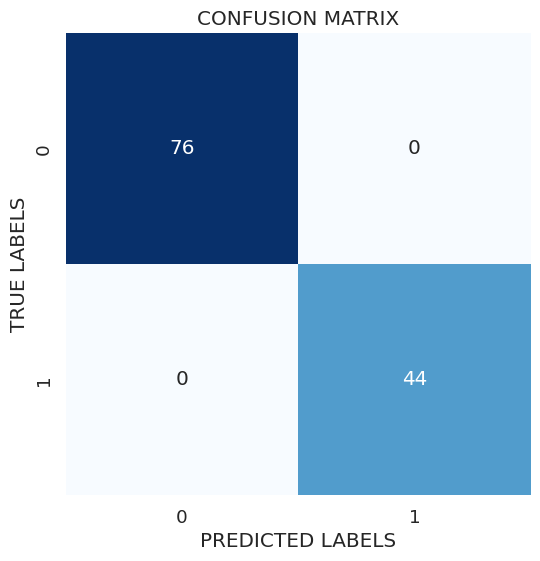

AUC: <function auc at 0x77ff152e69e0>


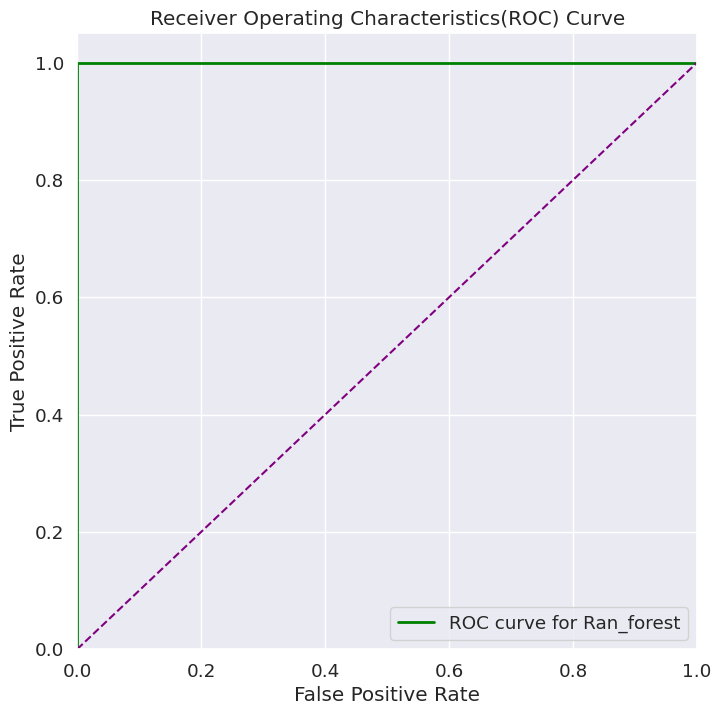

SELECTED FEATURES: ['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar', 'redbloodcells', 'puscell', 'bloodglucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packedcell_volume', 'whitebloodcell_count', 'redbloodcell_count', 'hypertension', 'diabetes_mellitus', 'appetite', 'pedaedema']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming 'X' is your feature matrix and 'y' is your target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#initialize the base model
base_model = RandomForestClassifier()
#initialize the wrapper method (RecursiveFeatureElimination)
number_of_features_to_select = 20
rfe = RFE(estimator=base_model, n_features_to_select=number_of_features_to_select)
#Perform cross_validation during feature_selection
X_train_selected = rfe.fit_transform(Xtrain_resampled, ytrain_resampled)
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

#Perform cross_validation during model_evaluation
cross_val_scores =cross_val_score(base_model, X_train_scaled, ytrain_resampled, cv=10, scoring='accuracy')
#Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

#Train the model on the full training data
base_model.fit(X_train_scaled, ytrain_resampled)

#Transform the testing data
X_test_selected =rfe.transform(Xtest)
X_test_scaled = scaler.transform(X_test_selected)

y_pred = base_model.predict(X_test_scaled)

#Calculate training and testing data
y_train_pred = base_model.predict(X_train_scaled)
y_test_pred = base_model.predict(X_test_scaled)

#Calculate training and testing Accuracy
#RFC_accuracy = [accuracy_score(y_true, y_pred) for y_true, y_pred in [(ytrain_resampled, y_train_pred), (ytest, y_test_pred)]]

#printing training, testing accuracy and classification report
#print("Training Accuracy and Testing Accuracy:", RFC_accuracy)
#Calculate training and testing Accuracy
training_accuracy = accuracy_score(ytrain_resampled, y_train_pred)
testing_accuracy = accuracy_score(ytest, y_test_pred)

#printing training, testing accuracy and classification report
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)
print(classification_report(ytest,y_pred))

#Creating confusion matrix assuming y_test is the true labels and y_pred is predicted Labels
confu_matrix = confusion_matrix(ytest, y_pred)

#Plot the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('PREDICTED LABELS')
plt.ylabel('TRUE LABELS')
plt.title('CONFUSION MATRIX')
plt.show()

#Calculate AUC
y_probability = base_model.predict_proba(X_test_scaled)[:, 1]
AUC =roc_auc_score(ytest, y_probability)
print("AUC:", auc)

#Plot ROC curve
fpr, tpr, thresholds =roc_curve(ytest, y_probability)
fnr, tnr, thresholds =roc_curve(ytest, y_probability)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve for Ran_forest'.format(auc))
plt.plot([0,1],[0,1], color='purple', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#get the selected features
selected_features_mask = rfe.support_

#get the indices of selected features
selected_features_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

#List the names of selected features
selected_feature_names = list(X_train.columns[selected_features_indices])
print("SELECTED FEATURES:", selected_feature_names)




# ***LightGBM Model***

[LightGBM] [Info] Number of positive: 250, number of negative: 250
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

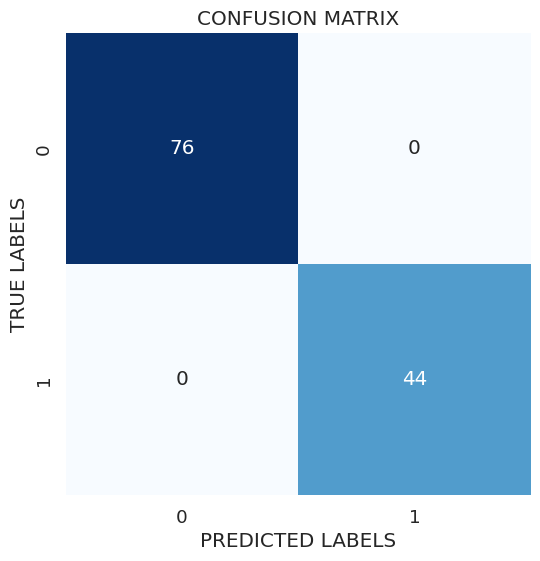

AUC: <function auc at 0x77ff152e69e0>


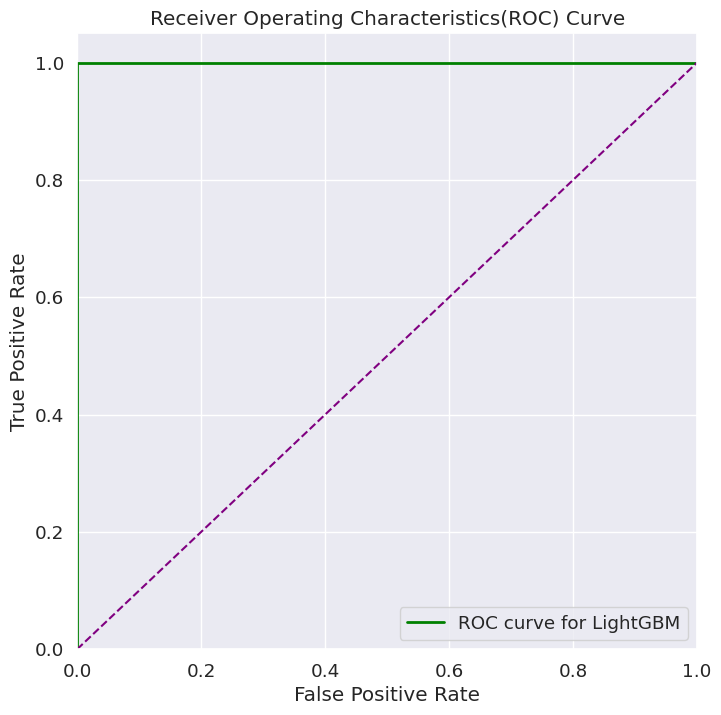

SELECTED FEATURES: ['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar', 'bloodglucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packedcell_volume', 'whitebloodcell_count', 'redbloodcell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedaedema', 'anemia']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming 'X' is your feature matrix and 'y' is your target vector
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#initialize the base model
base_model = lgb.LGBMClassifier()
#initialize the wrapper method (RecursiveFeatureElimination)
number_of_features_to_select = 20
rfe = RFE(estimator=base_model, n_features_to_select=number_of_features_to_select)
#Perform cross_validation during feature_selection
X_train_selected = rfe.fit_transform(Xtrain_resampled, ytrain_resampled)
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

#Perform cross_validation during model_evaluation
cross_val_scores =cross_val_score(base_model, X_train_scaled, ytrain_resampled, cv=10, scoring='accuracy')
#Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

#Train the model on the full training data
base_model.fit(X_train_scaled, ytrain_resampled)

#Transform the testing data
X_test_selected =rfe.transform(Xtest)
X_test_scaled = scaler.transform(X_test_selected)

y_pred = base_model.predict(X_test_scaled)

#Calculate training and testing data
y_train_pred = base_model.predict(X_train_scaled)
y_test_pred = base_model.predict(X_test_scaled)

#Calculate training and testing Accuracy
#lgb_accuracy = [accuracy_score(y_true, y_pred) for y_true, y_pred in [(ytrain_resampled, y_train_pred), (ytest, y_test_pred)]]
training_accuracy = accuracy_score(ytrain_resampled, y_train_pred)
testing_accuracy = accuracy_score(ytest, y_test_pred)
#printing training, testing accuracy and classification report
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)
print(classification_report(ytest,y_pred))

#Creating confusion matrix assuming y_test is the true labels and y_pred is predicted Labels
confu_matrix = confusion_matrix(ytest, y_pred)

#Plot the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('PREDICTED LABELS')
plt.ylabel('TRUE LABELS')
plt.title('CONFUSION MATRIX')
plt.show()

#Calculate AUC
y_probability = base_model.predict_proba(X_test_scaled)[:, 1]
AUC =roc_auc_score(ytest, y_probability)
print("AUC:", auc)

#Plot ROC curve
fpr, tpr, thresholds =roc_curve(ytest, y_probability)
fnr, tnr, thresholds =roc_curve(ytest, y_probability)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve for LightGBM'.format(auc))
plt.plot([0,1],[0,1], color='purple', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#get the selected features
selected_features_mask = rfe.support_

#get the indices of selected features
selected_features_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

#List the names of selected features
selected_feature_names = list(X_train.columns[selected_features_indices])
print("SELECTED FEATURES:", selected_feature_names)



#  Support Vector Machine Model

Cross-Validation Scores: [0.94642857 0.96428571 0.98214286 1.         0.92857143]
Average Cross-Validation Score: 0.9642857142857142
Traing Accuracy : 0.9964285714285714
Testing Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.98      0.95      0.97        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



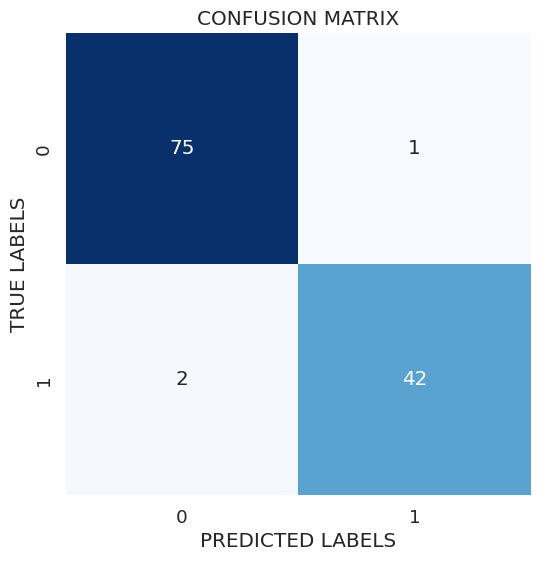

AUC: <function auc at 0x77ff152e69e0>


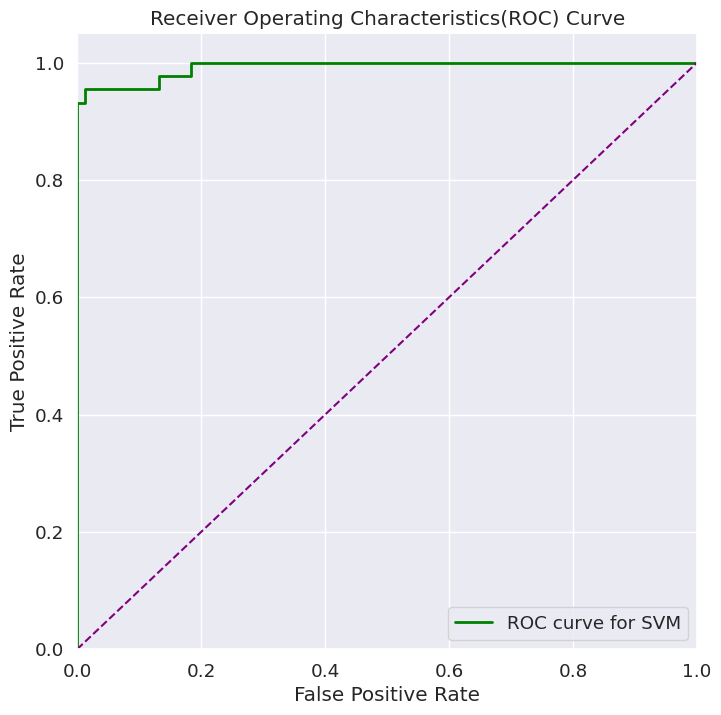

SELECTED FEATURES: ['age', 'bloodpressure', 'specificgravity', 'albumin', 'sugar', 'redbloodcells', 'puscell', 'bloodglucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packedcell_volume', 'redbloodcell_count', 'hypertension', 'diabetes_mellitus', 'appetite', 'pedaedema', 'anemia']


In [ ]:
#from keras.engine.functional import saved_model_utils
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#X_train = df.drop(['class'], axis=0) # X-feature
#y_train = df['class'] # y-feature
#X_train.shape, y_train.shape
X_train = df.drop(['class'], axis=1)
y_train = df['class']
X_train.shape, y_train.shape

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#initialize the wrapper method (RecursiveFeatureElimination)
number_of_features_to_select = 20
svm_classifier = SVC(kernel='linear')
rfe = RFE(estimator=svm_classifier, n_features_to_select=number_of_features_to_select)
X_train_selected = rfe.fit_transform(Xtrain, ytrain)
selected_features_mask = rfe.support_

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(Xtest.iloc[:, selected_features_mask])

#Perform Cross-Validation with SVM
svm_classifier = SVC(kernel='linear', probability=True)
cv_accuracy_score = cross_val_score(svm_classifier, X_train_scaled, ytrain, cv=5, scoring='accuracy')

# Print Cross-validation scores and average cross-validation Score
print("Cross-Validation Scores:", cv_accuracy_score)
print("Average Cross-Validation Score:", cv_accuracy_score.mean())

#Train the model on the full training data
svm_classifier.fit(X_train_scaled, ytrain)

#Evaluate the model on the test data
y_pred = svm_classifier.predict(X_test_scaled)

#Predict the training and testing data
y_train_pred = svm_classifier.predict(X_train_scaled)
y_test_pred = svm_classifier.predict(X_test_scaled)

#calculate training and testing accuracy of the model
#svm_accuracy = [accuracy_score(y_true, y_pred) for y_true, y_pred in [(ytrain, y_train_pred), (ytest, y_test_pred)]]
training_accuracy = accuracy_score(ytrain, y_train_pred)
testing_accuracy = accuracy_score(ytest, y_test_pred)
#Print training and testing results
print("Traing Accuracy :", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

#Print Classification Report
print(classification_report(ytest, y_pred))

#Creating confusion matrix assuming y_test is the true labels and y_pred is predicted Labels
confu_matrix = confusion_matrix(ytest, y_pred)

#Plot the Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('PREDICTED LABELS')
plt.ylabel('TRUE LABELS')
plt.title('CONFUSION MATRIX')
plt.show()

#Calculate AUC
y_probability = svm_classifier.predict_proba(X_test_scaled)[:, 1]
AUC =roc_auc_score(ytest, y_probability)
print("AUC:", auc)

#Plot ROC curve
fpr, tpr, thresholds =roc_curve(ytest, y_probability)
fnr, tnr, thresholds =roc_curve(ytest, y_probability)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve for SVM'.format(auc))
plt.plot([0,1],[0,1], color='purple', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics(ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#get the selected features
selected_features_mask = rfe.support_

#get the indices of selected features
selected_features_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

#List the names of selected features
selected_feature_names = list(X_train.columns[selected_features_indices])
print("SELECTED FEATURES:", selected_feature_names)



# **BAR PLOT VISUALIZATION FOR PREDICTED MODELS USING FEATURE SELECTION**

In [ ]:
import plotly.express as px
Names =["Logistic_Regression","Random_Forest_Classifier","LightGBM","Support_Vector_Machine"]
acc_scores_models =[0.9833, 1.0, 1.0, 0.975]
#Building a dataframe
d ={'Models': Names, 'Accuracy': acc_scores_models}
df = pd.DataFrame(d)
#Visualize the bar plot using Plotly
figure = px.bar(df, x='Models', y='Accuracy', title='Comparision Between the Models with Selected Features', labels={'Models':'MODELS', 'Accuracy': 'Accuracy of Different Models'}, template = 'plotly_dark')
figure.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Example AUC scores for different models
model_names = ['Logistic_Regresssion', 'RandomForest_Classifier', 'LightGBM','Support_Vector_Machine']
auc_scores = [1.0, 1.0, 1.0, 1.0]

# Generate synthetic ROC curve data for each model
fpr_list = []
tpr_list = []
for score in auc_scores:
    fpr, tpr, _ = roc_curve(np.random.randint(2, size=100), np.random.rand(100))
    fpr_list.append(fpr)
    tpr_list.append(tpr)

# Plotting AUC curves
plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    plt.plot(fpr_list[i], tpr_list[i], label=f'{model_names[i]} (AUC = {auc_scores[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# **BAR PLOT VISUALIZATION FOR PREDICTED MODELS USING ALL THE FEATURES**

In [ ]:
import plotly.express as px
Names =["Logistic_Regression","Random_Forest_Classifier","LightGBM","Support_Vector_Machine"]
acc_scores_models =[0.900, 0.98, 0.96, 0.50]
#Building a dataframe
d ={'Models': Names, 'Accuracy': acc_scores_models}
df = pd.DataFrame(d)
#Visualize the bar plot using Plotly
figure = px.bar(df, x='Models', y='Accuracy', title='Comparision Between the Models with All Features', labels={'Models':'MODELS', 'Accuracy': 'Accuracy of Different Models'}, template = 'plotly_dark')
figure.show()

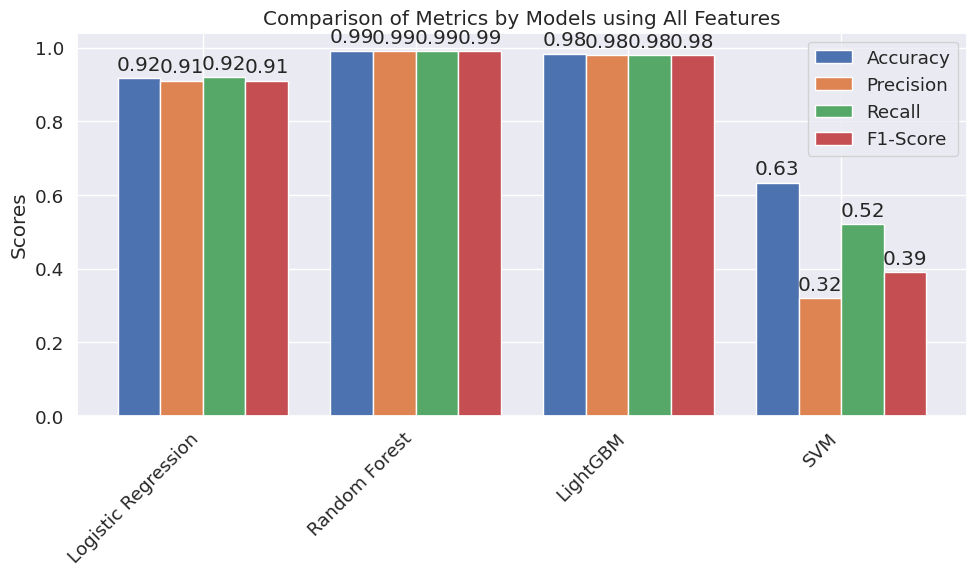

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Logistic Regression', 'Random Forest', 'LightGBM', 'SVM']
accuracy = [0.9166, 0.9916, 0.9833, 0.6333]
precision = [0.91, 0.99, 0.98, 0.32]
recall = [0.92, 0.99, 0.98, 0.52]
f1_score = [0.91, 0.99, 0.98, 0.39]

x = np.arange(len(models))
width = 0.2 # Width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width*0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-Score')


ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics by Models using All Features')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Function to add the text labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

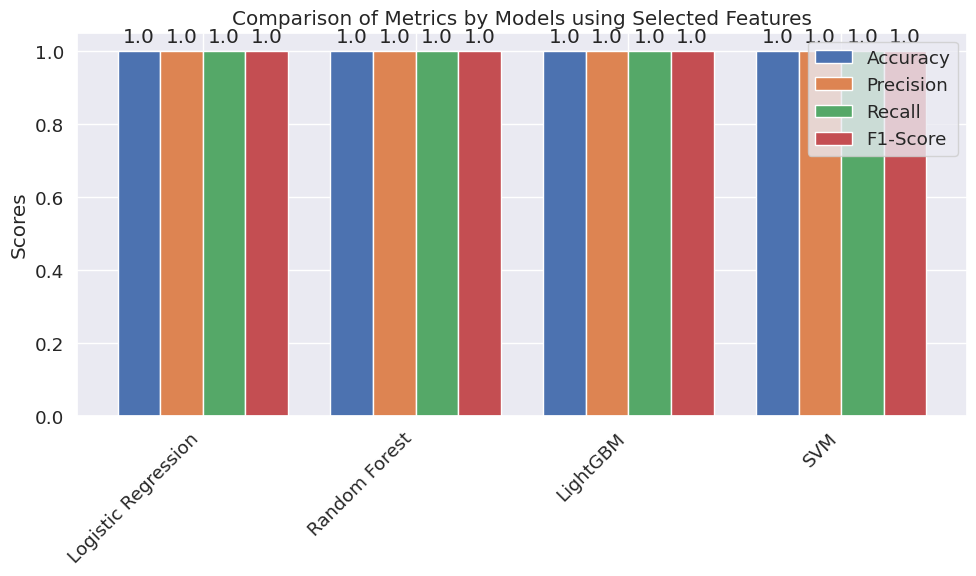

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Logistic Regression', 'Random Forest', 'LightGBM', 'SVM']
accuracy = [1.0, 1.0, 1.0, 1.0]
precision = [1.0, 1.0, 1.0, 1.0]
recall = [1.0, 1.0, 1.0, 1.0]
f1_score = [1.0, 1.0, 1.0, 1.0]

x = np.arange(len(models))
width = 0.2 # Width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width*0.5, precision, width, label='Precision')
rects3 = ax.bar(x + width*0.5, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-Score')


ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics by Models using Selected Features')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Function to add the text labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()